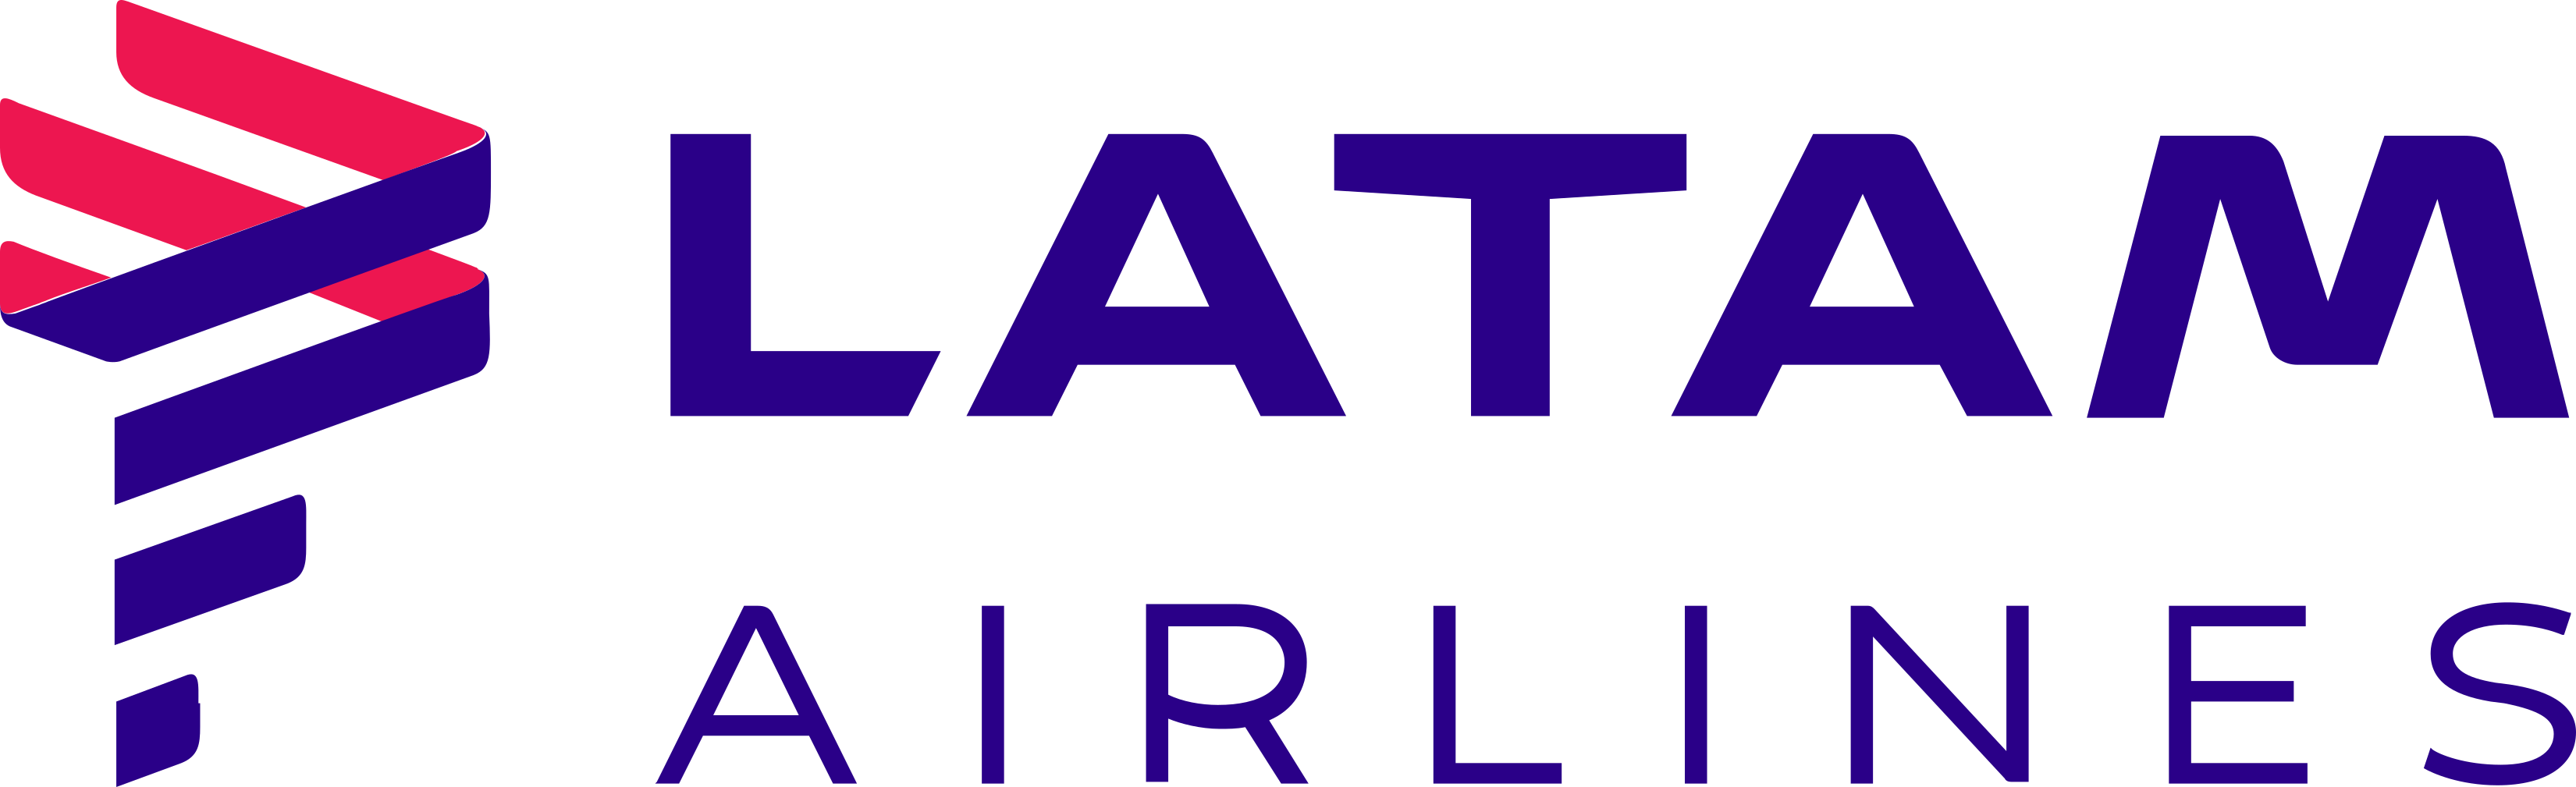

# Desafío LATAM  
### Nombre: Carlos Spoerer
## Problema:

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:  

- **Fecha-I :** Fecha y hora programada del vuelo.
- **Vlo-I :** Número de vuelo programado.
- **Ori-I :** Código de ciudad de origen programado. 
- **Des-I :** Código de ciudad de destino programado. 
- **Emp-I :** Código aerolínea de vuelo programado. 
- **Fecha-O :** Fecha y hora de operación del vuelo. 
- **Vlo-O :** Número de vuelo de operación del vuelo. 
- **Ori-O :** Código de ciudad de origen de operación 
- **Des-O :** Código de ciudad de destino de operación. 
- **Emp-O :** Código aerolínea de vuelo operado.
- **DIA :** Día del mes de operación del vuelo.
- **MES :** Número de mes de operación del vuelo.
- **AÑO :** Año de operación del vuelo.
- **DIANOM :** Día de la semana de operación del vuelo. 
- **TIPOVUELO :** Tipo de vuelo, I =Internacional, N =Nacional. 
- **OPERA :** Nombre de aerolínea que opera.
- **SIGLAORI :** Nombre ciudad origen.
- **SIGLADES :** Nombre ciudad destino.

## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

**Pasos a seguir:**  
  
  
**1.1** Primero que nada importaremos las librerías a utilizar  
**1.2** Importamos el Dataset y visualizamos las primeras 5 filas  
**1.3** Mostraremos la dimensión  
**1.4** Identicaremos el tipo de variables  
**1.5** Buscaremos si hay datos faltantes  
**1.6** Visualizaremos la distribución de los datos a través de gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from datetime import datetime

#Configuramos el archivo para que no aparezcan "warnings"
warnings.filterwarnings('ignore')

#Fijamos los tamaños de los gráficos y tamaño de ejes
plt.rcParams["figure.figsize"] = (20,10)
sns.set(font_scale = 2)


In [2]:
df = pd.read_csv("dataset_SCL.csv")

In [3]:
# 
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
["SIGLAORI", "SIGLADES", "DIA", "MES", "AÑO", "DIANOM", "TIPOVUELO", "OPERA"]

['SIGLAORI', 'SIGLADES', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA']

In [5]:
print(f"El Dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas")

El Dataset contiene 68206 filas y 18 columnas


In [6]:
# Con este método visualizo de forma global la composición del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [7]:
# Veo si existen valors nulos en el Dataset
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
column type,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,object,object,object,object,object
null values (nb),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.001466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


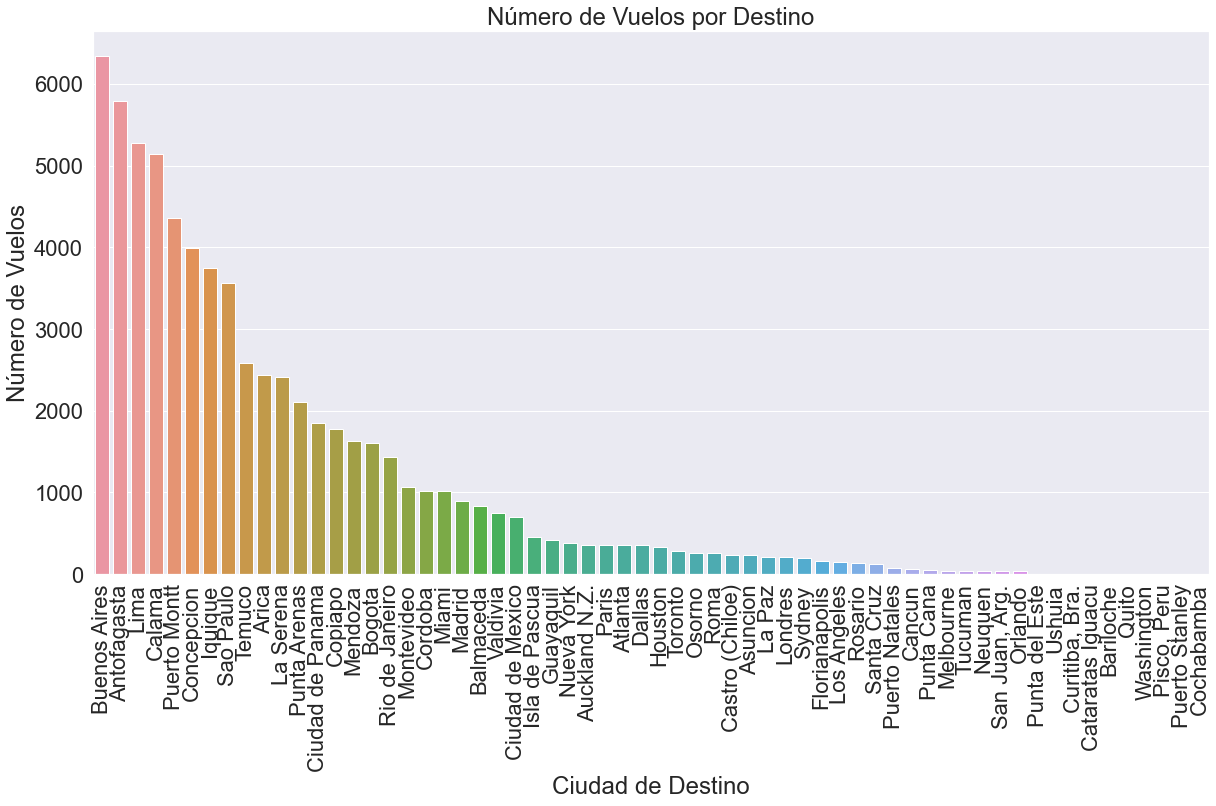

In [8]:
# Genero un DataFrame con nombres de columnas "index" y "SIGLADES"
df_destino = df["SIGLADES"].value_counts().reset_index()

# Grafico utilizando la librería seaborn
ax = sns.barplot(df_destino["index"] , df_destino["SIGLADES"])

# Asigno el título y nombres a los ejes
ax.set(xlabel = "Ciudad de Destino", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos por Destino")

# Roto los nombres del eje "x" para un mayor orden
plt.xticks(rotation=90)
plt.show()

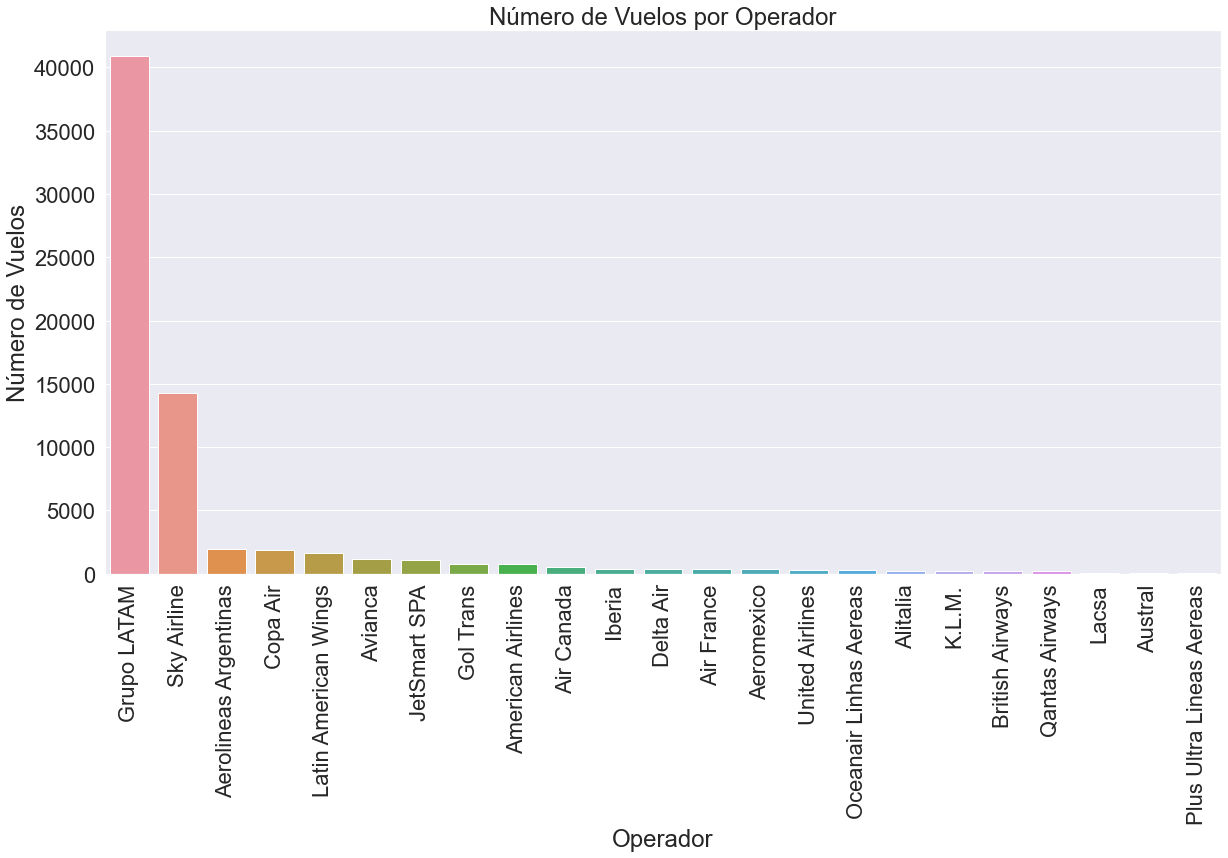

In [9]:
# Genero un DataFrame con nombres de columnas "index" y "OPERA"
df_opera = df["OPERA"].value_counts().reset_index()

# Grafico utilizando la librería seaborn
ax = sns.barplot(df_opera["index"] , df_opera["OPERA"])

# Asigno el título y nombres a los ejes
ax.set(xlabel = "Operador", ylabel = "Número de Vuelos", title = "Número de Vuelos por Operador")

# Roto los nombres del eje "x" para un mayor orden
plt.xticks(rotation=90)
plt.show()

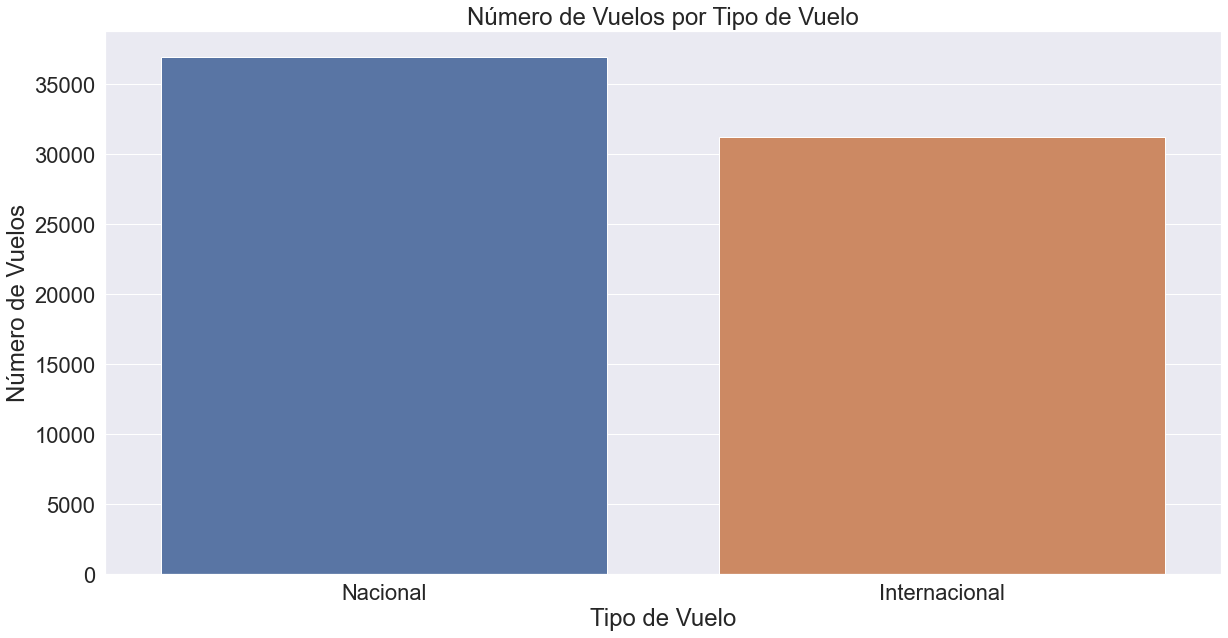

In [10]:
# Asigno los nombres N:"Nacional" e I:"Internacional"
df["TIPOVUELO"] = np.where(df["TIPOVUELO"]=="N","Nacional","Internacional")

# Genero un DataFrame con nombres de columnas "index" y "TIPOVUELO"
df_tipo = df["TIPOVUELO"].value_counts().reset_index()

# Grafico utilizando la librería seaborn
ax = sns.barplot(df_tipo["index"] , df_tipo["TIPOVUELO"], dodge=True)

# Asigno el título y nombres a los ejes
ax.set(xlabel = "Tipo de Vuelo", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos por Tipo de Vuelo")

#change_width(ax, .35)

plt.show()

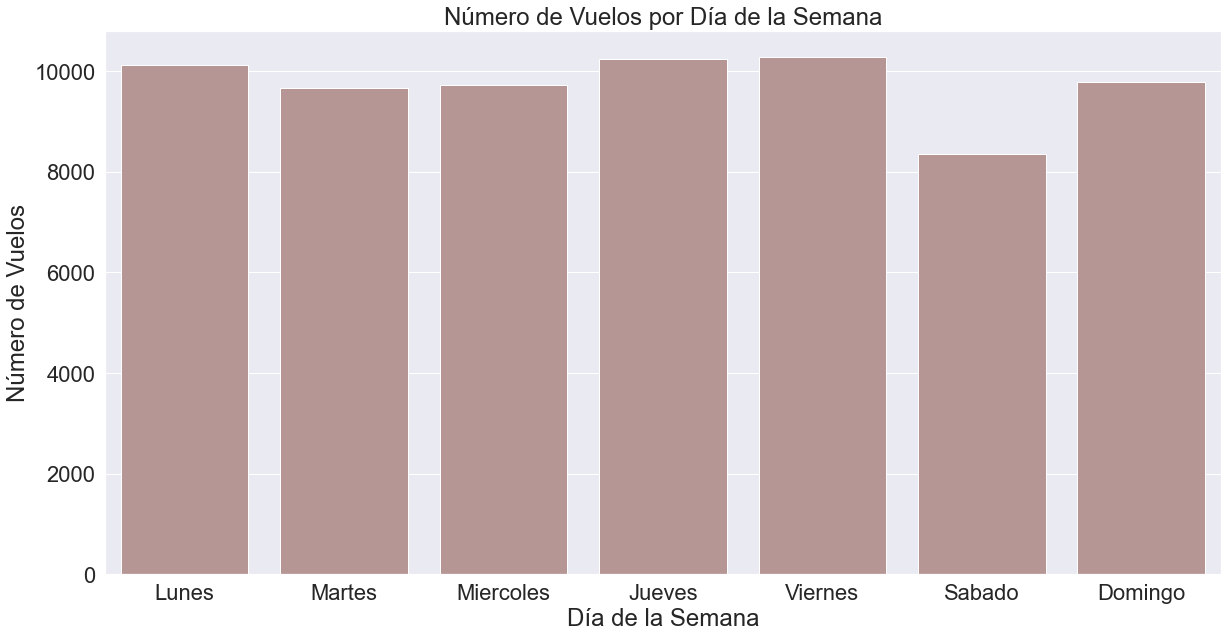

In [11]:
# Creo una lista de nombre "cats" que contiene los días de la semana en orden que me servirá para ordernar los índices
cats = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

# Genero un DataFrame con nombres de columnas "index" y "DIANOM"
df_dia_semana = df["DIANOM"].value_counts().reindex(cats).reset_index()

# Grafico utilizando la librería seaborn
ax = sns.barplot(df_dia_semana["index"] , df_dia_semana["DIANOM"], color="rosybrown")

# Asigno el título y nombres a los ejes
ax.set(xlabel = "Día de la Semana", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos por Día de la Semana")

plt.show()

In [12]:
# Creo una función para asignar el nombre de los meses de acuerdo al número
def mes_vol(mes):
    if mes == 1: return "Enero" 
    if mes == 2: return "Febrero"
    if mes == 3: return "Marzo"
    if mes == 4: return "Abril"
    if mes == 5: return "Mayo"
    if mes == 6: return "Junio"
    if mes == 7: return "Julio"
    if mes == 8: return "Agosto"
    if mes == 9: return "Septiembre"
    if mes == 10: return "Octubre"
    if mes == 11: return "Noviembre"
    if mes == 12: return "Diciembre"

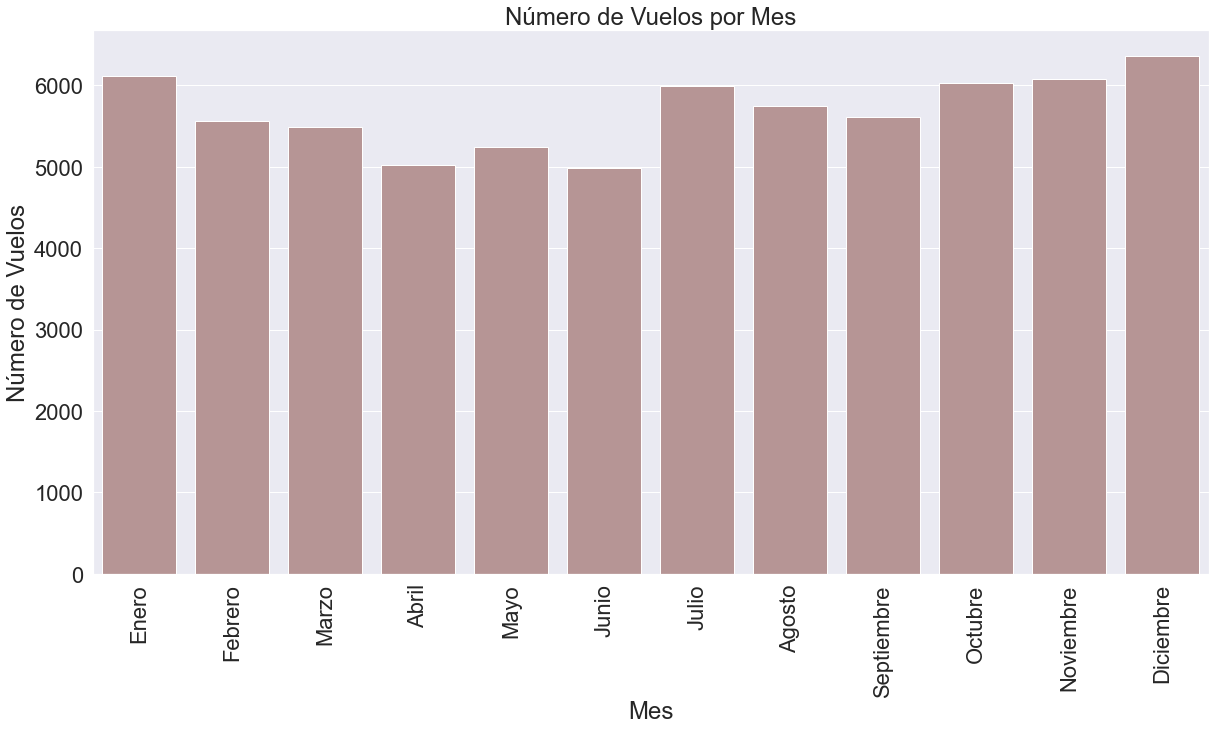

In [13]:
# Creo una lista de nombre "cats" que contiene los meses del año en orden que me servirá para ordernar los índices
cats = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Llamo a la función "mes_vol" y le asino los nuevos valores a "MES"
df["MES"] = df["MES"].apply(mes_vol)

# Genero un DataFrame con nombres de columnas "index" y "MES"
df_mes = df["MES"].value_counts().reindex(cats).reset_index()

# Grafico utilizando la librería seaborn
ax = sns.barplot(df_mes["index"] , df_mes["MES"], color="rosybrown")

# Asigno el título y nombres a los ejes
ax.set(xlabel = "Mes", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos por Mes")

# Roto los nombres del eje "x" para un mayor orden
plt.xticks(rotation=90)
plt.show()

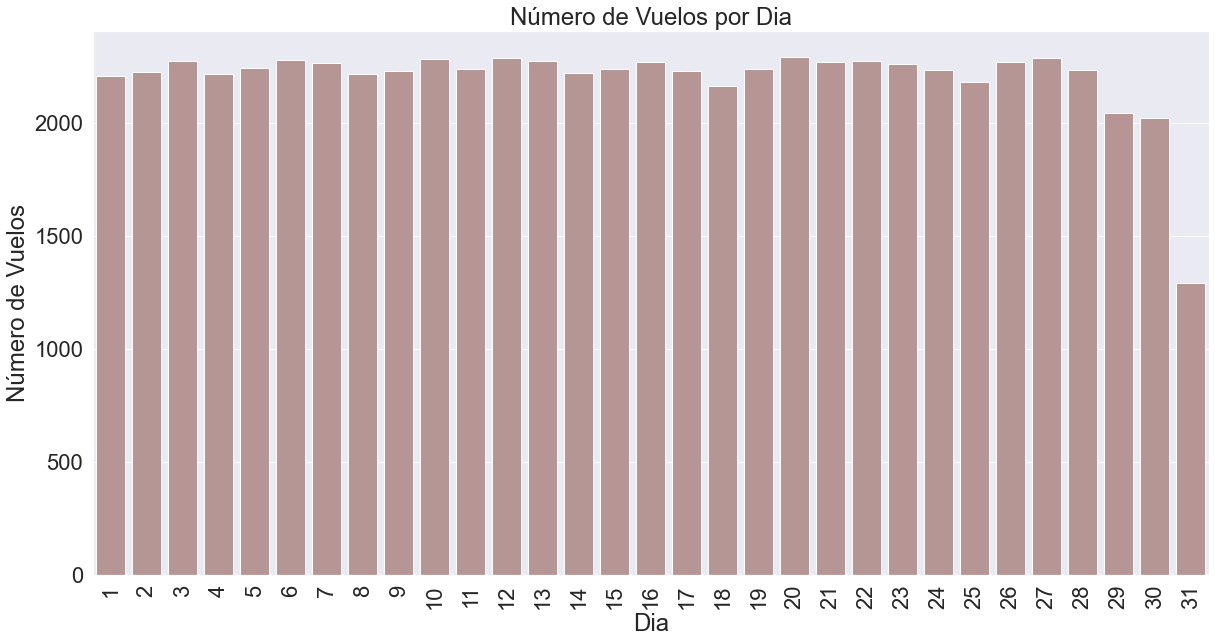

In [14]:
# Genero un DataFrame con nombres de columnas "index" y "DIA"
df_dia = df["DIA"].value_counts().reset_index()

# Grafico utilizando la librería seaborn
ax = sns.barplot(df_dia["index"] , df_dia["DIA"], color="rosybrown")

# Asigno el título y nombres a los ejes
ax.set(xlabel = "Dia", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos por Dia")

# Roto los nombres del eje "x" para un mayor orden
plt.xticks(rotation=90)
plt.show()

# Conclusiones

**Destinos Internacionales:**
- El destino internacional con más vuelos fue Buenos Aires seguido por Lima. 
- Ambos son destinos Internacionales vecinos de Chile.
- Interesantes destinos culturales (Machu-Pichu/Buenos Aires) y Gastronómicos.
- Para el caso de Buenos Aires, en ese momento el tipo de cambio estaba muy alto (se encontraba en los 2 dígitos) lo que beneficiaba a los chilenos.
- También puede ser que sean vuelos de pasada para tomar otro avión.  

**Destinos Nacionales:**  
- Zona Norte: Antofagasta y Calama. Se puede argumentar que existe una alta actividad minera de la zona.
- Zona Sur: Puerto Montt y Concepción. Al igual que la zona Norte la actividad pesquera es muy fuerte. También destacar que Concepción se encuentra en la región con la tercera mayor población en Chile.  

**Operador**:  
- LATAM es la mayor aerolinea a nivel nacional, seguido por Sky y Jetsmart.
- LATAM posee una mayor cantidad  de destinos en la región que el resto de las aerolineas que operan desde Santiago.
- LATAM posee más aviones que Sky y Jetsmart.

**Días de la Semana/Mes/Días del mes**:  
- Se observa que durante los días sábados hay una menor cantidad de vuelos. Probablemente se deba a que la gente prefiere quedarse en el destino durante los fines de semana y no viajando.  
- Los meses con mayor cantidad de vuelos son: Diciembre y Enero. Esto puede deberse a las vacaciones de verano. En Febrero baja bastante, podría ser explicado por la preparación de la época escalar.  Otro mes interesante, con una alta cantidad de vuelos, es Julio. Probablemente sea por las vacaciones de invierno.  
- Los dias del mes no se vé variación unos con otros, excepto los día de fin de mes. Como es el caso de: 
    - día 31: hay solo 7 días en el año  
    - día 30: hay solo 11 días en el año
    - día 29: hay solo 11 días en el año

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :  
- **temporada_alta :** 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.  
- **dif_min :** diferencia en minutos entre Fecha-O y Fecha-I  
- **atraso_15 :** 1 si dif_min > 15, 0 si no.  
- **periodo_dia :** mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

### **Obtención de la Variable *temporada_alta* :**

In [15]:
# Creo la variable Fecha-I1 (le indico que clase de formato con "format")
df['Fecha-I1'] = pd.to_datetime(df['Fecha-I'], format='%Y/%m/%d %H:%M:%S')

# Creo una función "TemporadaAlta" para ir cambiando el valor de la celda que se encuentre entre las fechas destacadas {0 y 1}
def TemporadaAlta(Temp_Alt):
    fmt = "%d-%b-%Y"
    d1=datetime.strptime("15-Dec-2017",fmt)
    d2=datetime.strptime("31-Dec-2017",fmt)
    d3=datetime.strptime("01-Jan-2017",fmt)
    d4=datetime.strptime("3-Mar-2017",fmt) 
    d5=datetime.strptime("15-Jul-2017",fmt) 
    d6=datetime.strptime("31-Jul-2017",fmt) 
    d7=datetime.strptime("11-Sep-2017",fmt) 
    d8=datetime.strptime("30-Sep-2017",fmt)
    
    if (((d1<= Temp_Alt) and (Temp_Alt<=d2)) or
    ((d3<= Temp_Alt) and (Temp_Alt<=d4)) or
    ((d5<= Temp_Alt) and (Temp_Alt<=d6)) or
    ((d7<= Temp_Alt) and (Temp_Alt<=d8))):
        return 1
    else:
        return 0
    

In [16]:
# A cada celda le aplico la función TemporadaAlta
df["temporada_alta"] = df['Fecha-I1'].apply(TemporadaAlta)

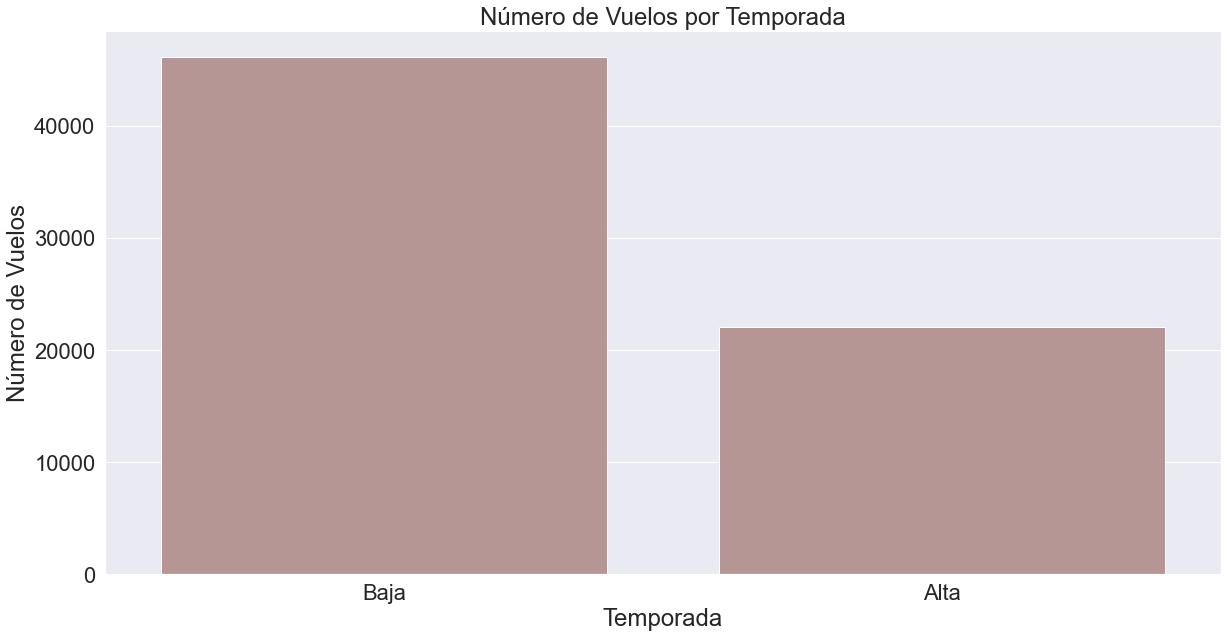

In [17]:
# Grafico para visualizar los vuelos por temporada
df["temporada_alta1"] = np.where(df["temporada_alta"]==1, "Alta", "Baja")
df_ta = df["temporada_alta1"].value_counts().reset_index()

ax=sns.barplot(df_ta["index"] , df_ta["temporada_alta1"], color="rosybrown")


ax.set(xlabel = "Temporada", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos por Temporada")
plt.show()

### **Obtención de la Variable *dif_min* :**

In [18]:
# Determino la diferencia en Minutos de la Fecha-O con Fecha-I
df['dif_min'] = ((pd.to_datetime(df['Fecha-O']) - pd.to_datetime(df['Fecha-I'])).astype('<m8[m]').astype(int))

### **Obtención de la Variable *atraso_15* :**

In [19]:
# Asigno 1 en caso de atraso y 0 en caso contrario
df['atraso_15'] = np.where(df['dif_min']<=15, 0, 1)

In [20]:
# Observo la cantidad de vuelos con atraso
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

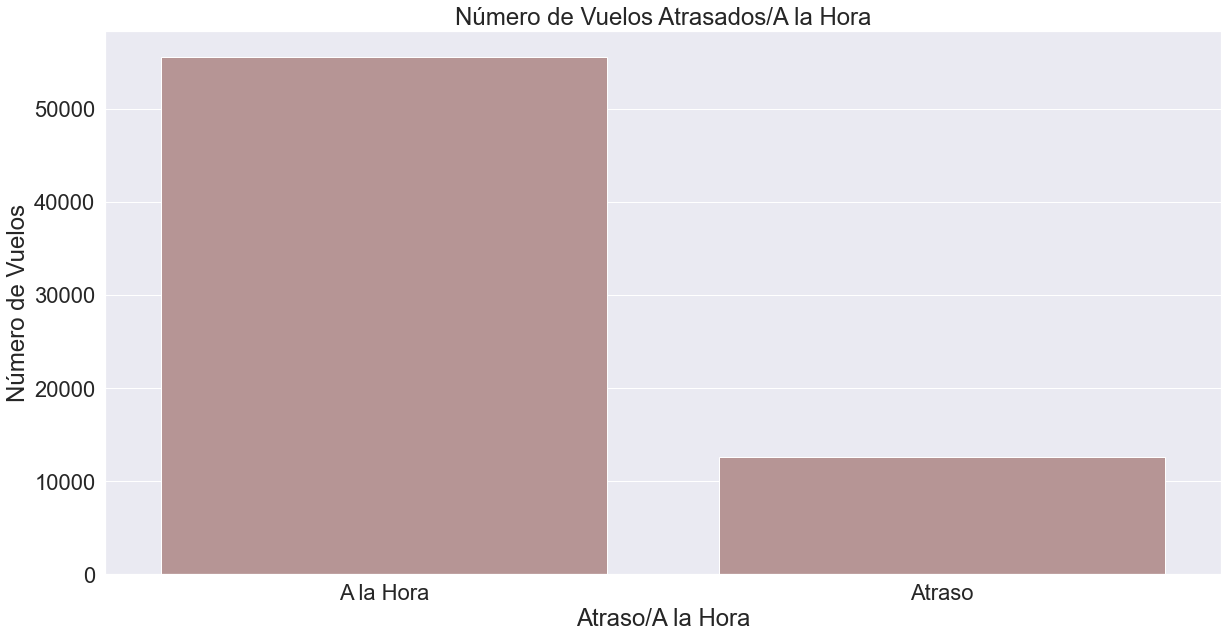

In [21]:
# Realizo un grafico para visualizar la proporción de vuelos que se atrasaron versus los que no
df["atraso"] = np.where(df['dif_min']<=15, "A la Hora", "Atraso")
df_at = df["atraso"].value_counts().reset_index()
ax = sns.barplot(df_at["index"] , df_at["atraso"], color="rosybrown")

ax.set(xlabel = "Atraso/A la Hora", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos Atrasados/A la Hora")

plt.show()

### **Obtención de la Variable *periodo_dia* :**

In [22]:
# Extraigo solo los horarios de la nueva variable Fecha-I1
df['Fecha-I1'] = df['Fecha-I1'].apply(lambda x: x.time())

# A través de la función periodo_dia determino si la Fecha-I es durante la mañana, tarde o noche
def periodo_dia(p_dia):
    fmt = '%H:%M'
    d1 = datetime.strptime("5:00", fmt).time() # Horario min mañana
    d2 = datetime.strptime("11:59", fmt).time() # Horario max mañana
    d3 = datetime.strptime("12:00", fmt).time() # Horario min tarde
    d4 = datetime.strptime("18:59", fmt).time() # Horario max tarde
    
    if (d1<=p_dia and p_dia<=d2):
        return "mañana"
    if (d3<=p_dia and p_dia<=d4):
        return "tarde"
    else:
        return "noche"

In [23]:
# Creo una nueva variable con el período del día en que se encuentra la Fecha-I
df["periodo_dia"] = df['Fecha-I1'].apply(periodo_dia)

In [24]:
# Observo la cantidad de vuelos en las distintas zonas del día
df["periodo_dia"].value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

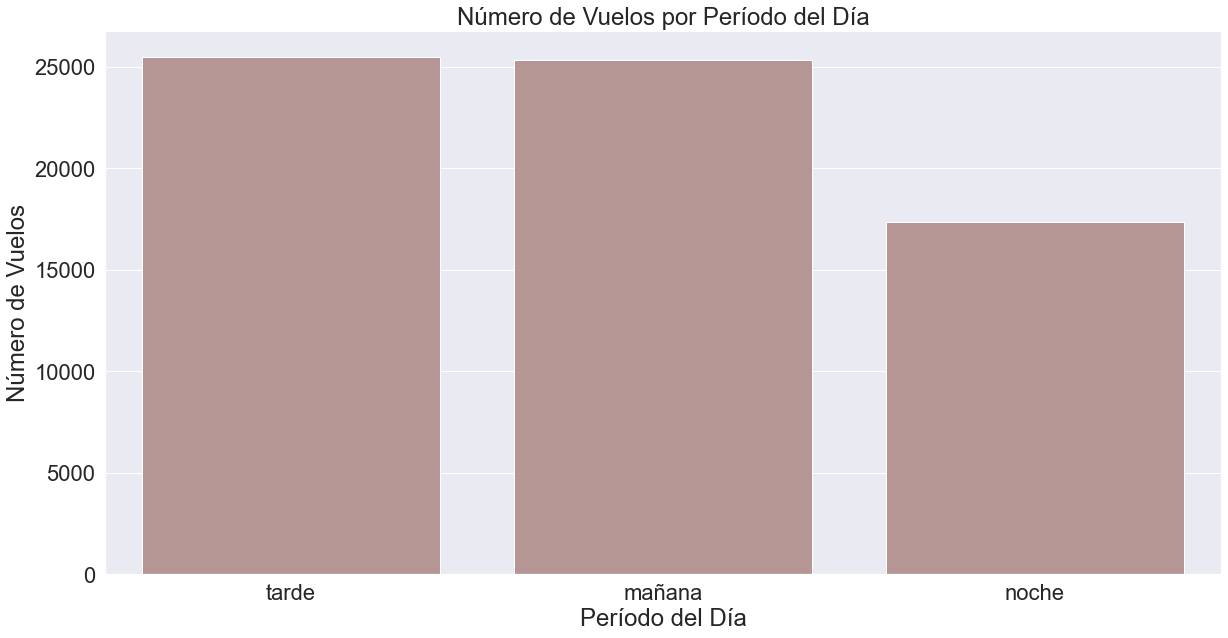

In [25]:
# Realizo un grafico para visualizar la proporción de vuelos en las distintas zonas del día
df_tao = df["periodo_dia"].value_counts().reset_index()
ax = sns.barplot(df_tao["index"] , df_tao["periodo_dia"], color="rosybrown")

ax.set(xlabel = "Período del Día", 
       ylabel = "Número de Vuelos", 
       title = "Número de Vuelos por Período del Día")

plt.show()

In [26]:
# Exporto las 4 variables a un archivo .csv con el nombre de "synthetic_features.csv"
df[["temporada_alta","dif_min","atraso_15","periodo_dia"]].to_csv("synthetic_features.csv", index = None, header= True)

## 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

### - ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

Realizaremos dos mediciones de tasas, una será considerando por actividad o periodo de tiempo y la otra será la proporción del total de los vuelos.

1. La siguiente fórmula muestra la forma en que se calculará la tasa de retraso (TAR). La variable "Aerolinea" solo es un ejemplo de cómo se determinará la Tasa de Retraso para el resto:

$$TAR\text% = \frac{\text{Num de atrasos x Aerolinea}}{\text{Num de Operaciones x Aerolinea}}\text{ x }100$$

In [27]:
# Generamos una función para calcular la tasa de retraso por destino, aerolínea, mes del año, 
# día de la semana, temporada y tipo de vuelo
def calcula_tasa(variable):

    x = df["atraso_15"].groupby(df[variable],sort=False).sum()
    r = df[variable].groupby(df[variable],sort=False).count()

    dic1 = {variable:[]}
    dic2 = {"Tasa Atraso %":[]}
    d3={}
    for i in range(len(x)):
        dic1[variable].append(x.index[i])
        dic2["Tasa Atraso %"].append(x[i]/(r[i])*100)
        #dic2["Tasa Atraso %"].append(x[i]/(len(df["atraso_15"]))*100)
        
    for d in (dic1, dic2): d3.update(d)
    d3=pd.DataFrame(d3)
    d3.set_index(variable, inplace = True)
    
    return d3


In [28]:
df["atraso_15"].sum()

12614

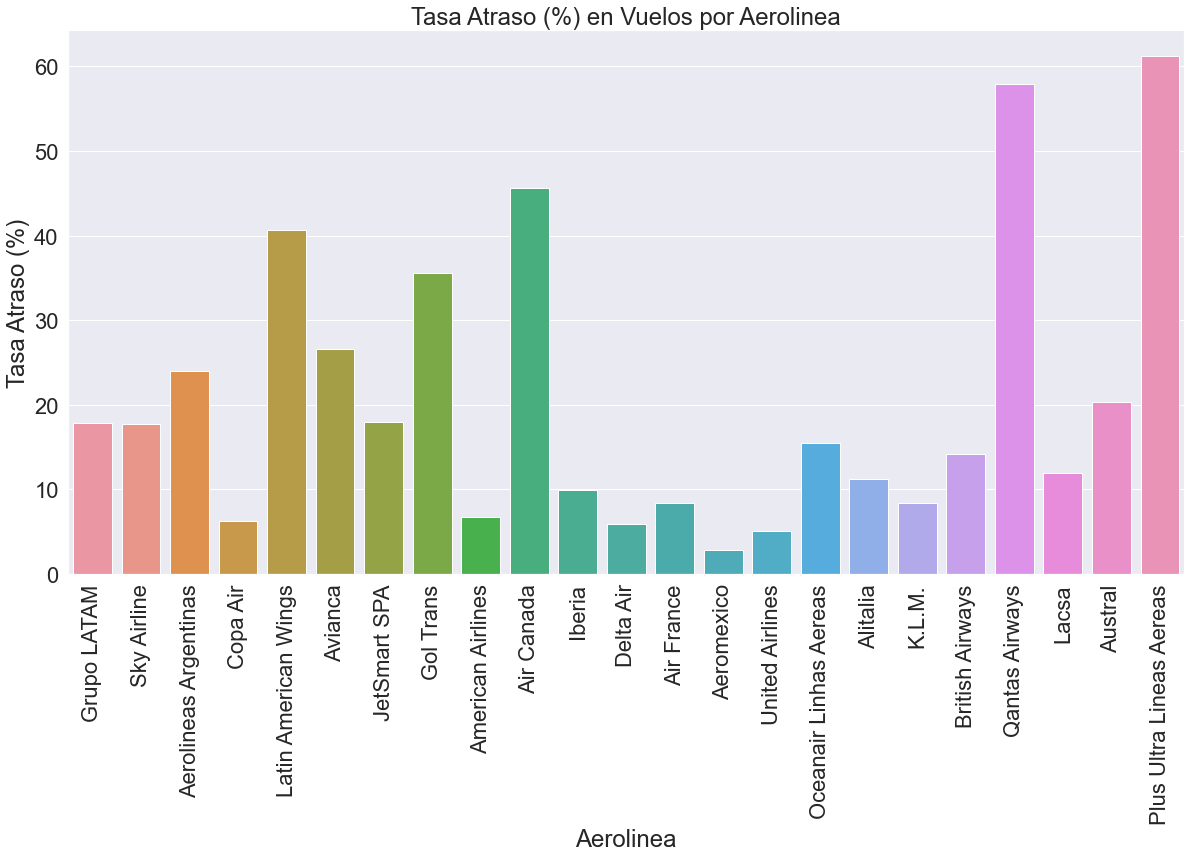

In [29]:
variable = "OPERA"
d = calcula_tasa(variable)
d = d.reindex(df_opera["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"])

ax.set(xlabel = "Aerolinea", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Aerolinea")
plt.xticks(rotation=90)
plt.show()

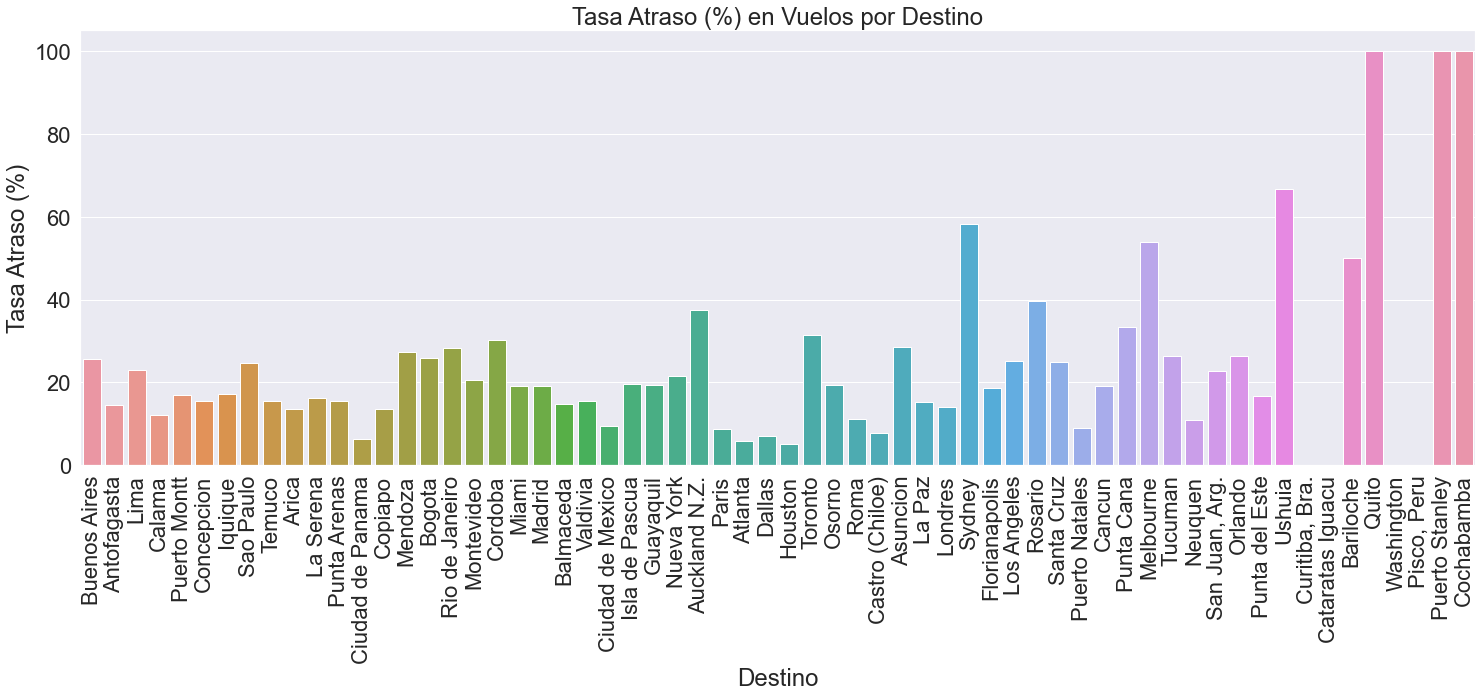

In [30]:
variable = "SIGLADES"
d = calcula_tasa(variable)
d = d.reindex(df_destino["index"].to_list())
d[variable] = d.index

plt.figure(figsize=(25,8))
ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"])

ax.set(xlabel = "Destino", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Destino")
plt.xticks(rotation=90)
plt.show()

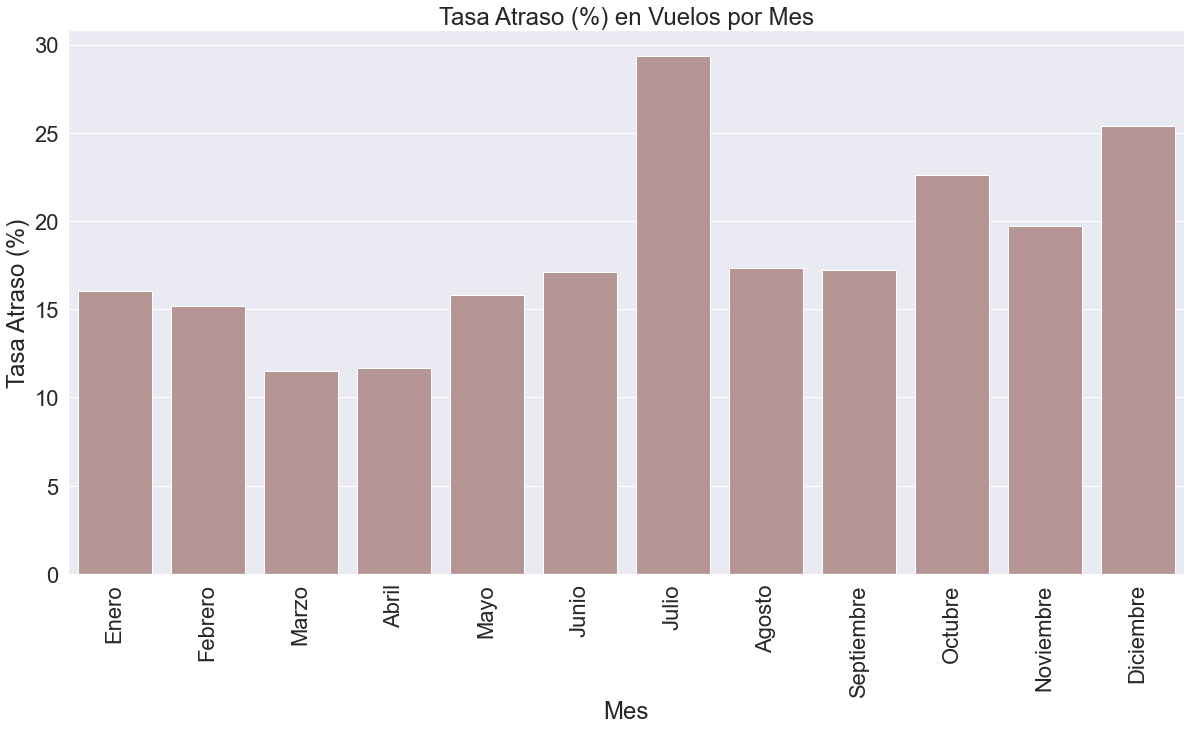

In [31]:
variable = "MES"
d = calcula_tasa(variable)
d = d.reindex(df_mes["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"],color="rosybrown")

ax.set(xlabel = "Mes", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Mes")
plt.xticks(rotation=90)
plt.show()

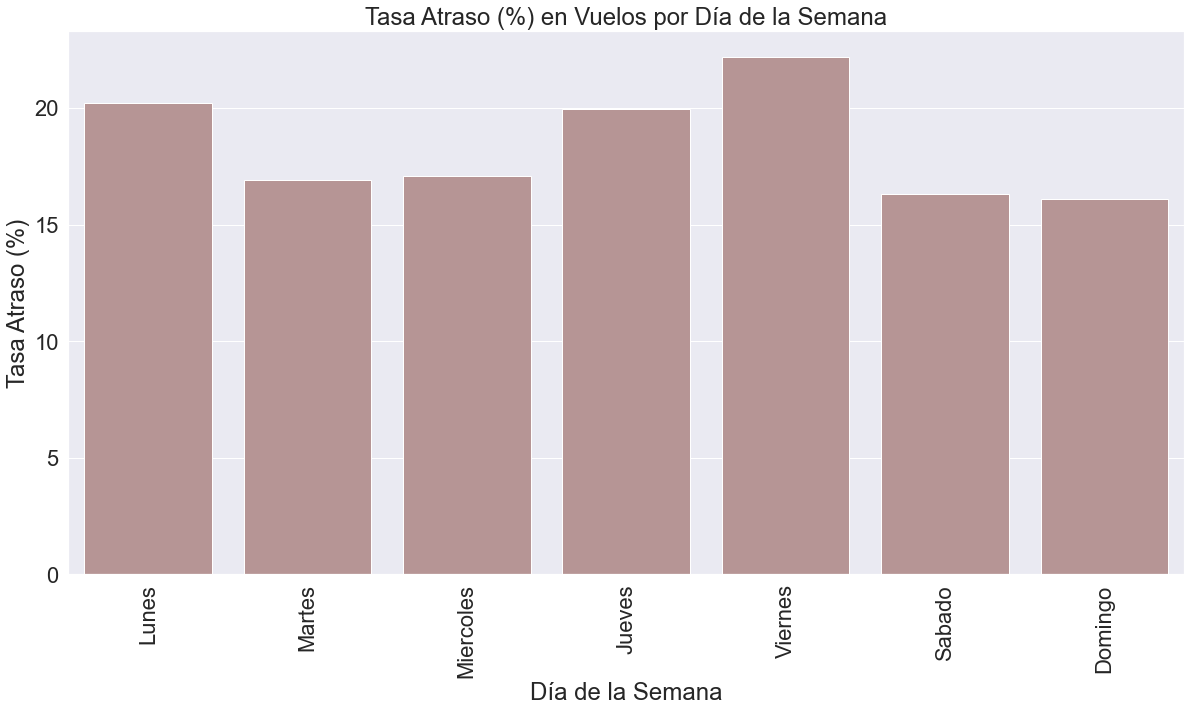

In [32]:
variable = "DIANOM"
d = calcula_tasa(variable)
d = d.reindex(df_dia_semana["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"],color="rosybrown")

ax.set(xlabel = "Día de la Semana", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Día de la Semana")
plt.xticks(rotation=90)
plt.show()

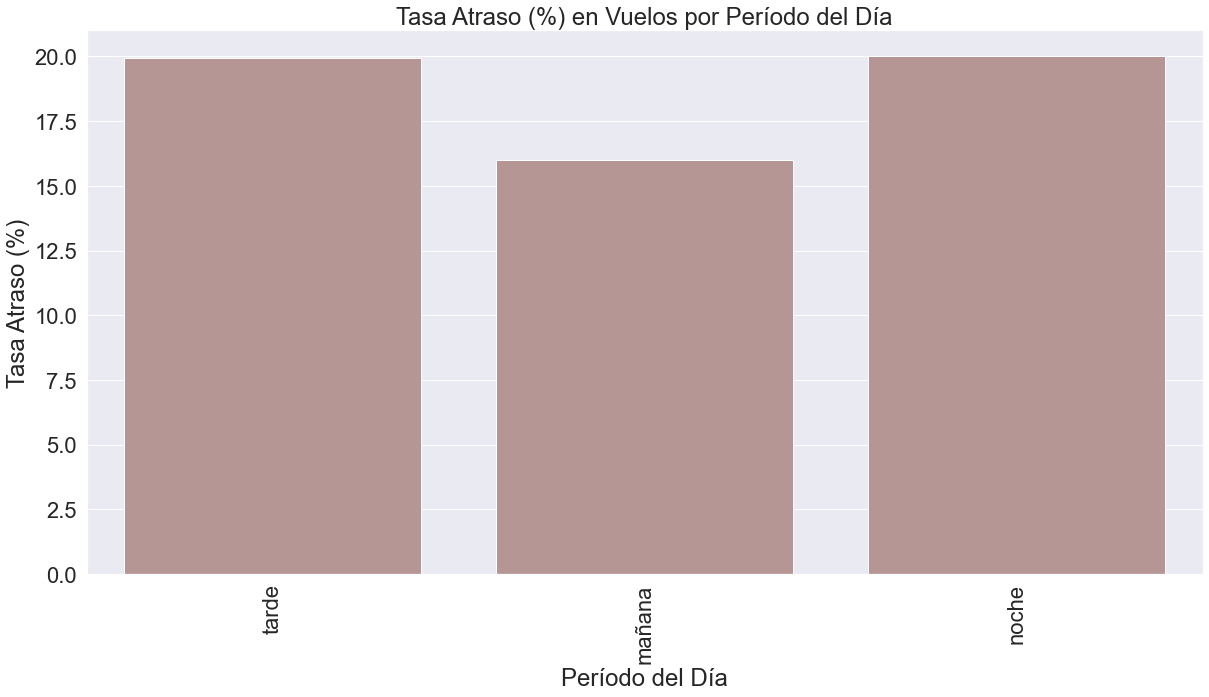

In [33]:
variable = "periodo_dia"
d = calcula_tasa(variable)
d = d.reindex(df_tao["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"], color="rosybrown")

ax.set(xlabel = "Período del Día", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Período del Día")
plt.xticks(rotation=90)
plt.show()

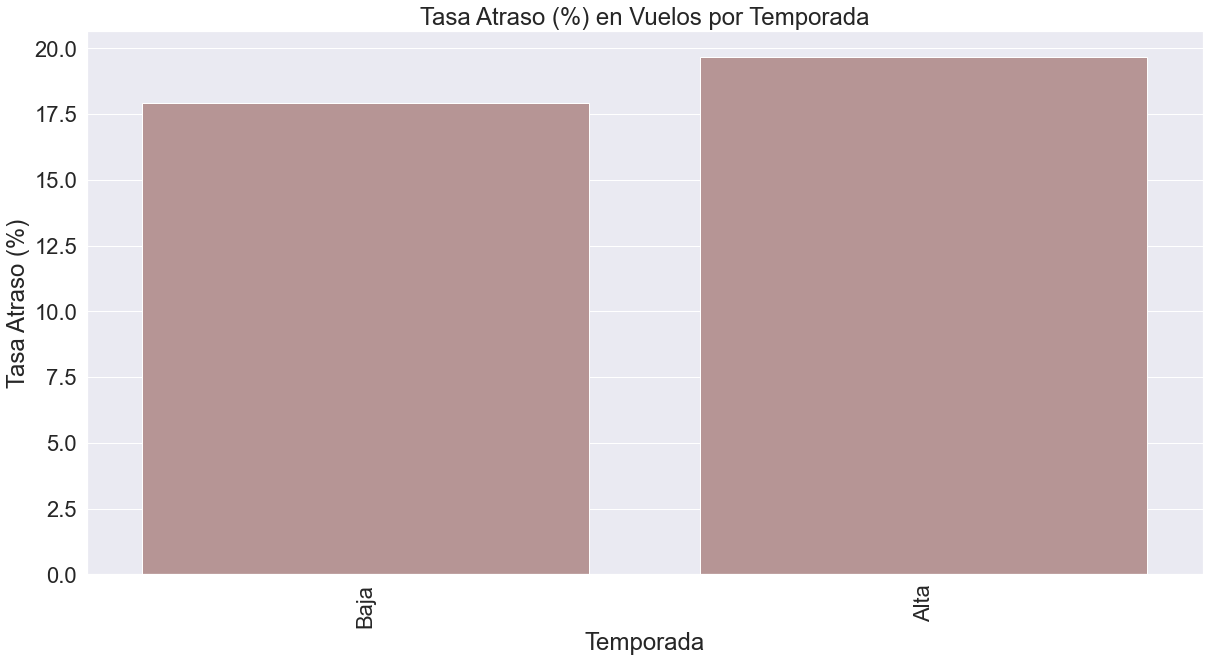

In [34]:
variable = "temporada_alta1"
d = calcula_tasa(variable)
d = d.reindex(df_ta["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"], color="rosybrown")

ax.set(xlabel = "Temporada", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Temporada")
plt.xticks(rotation=90)
plt.show()

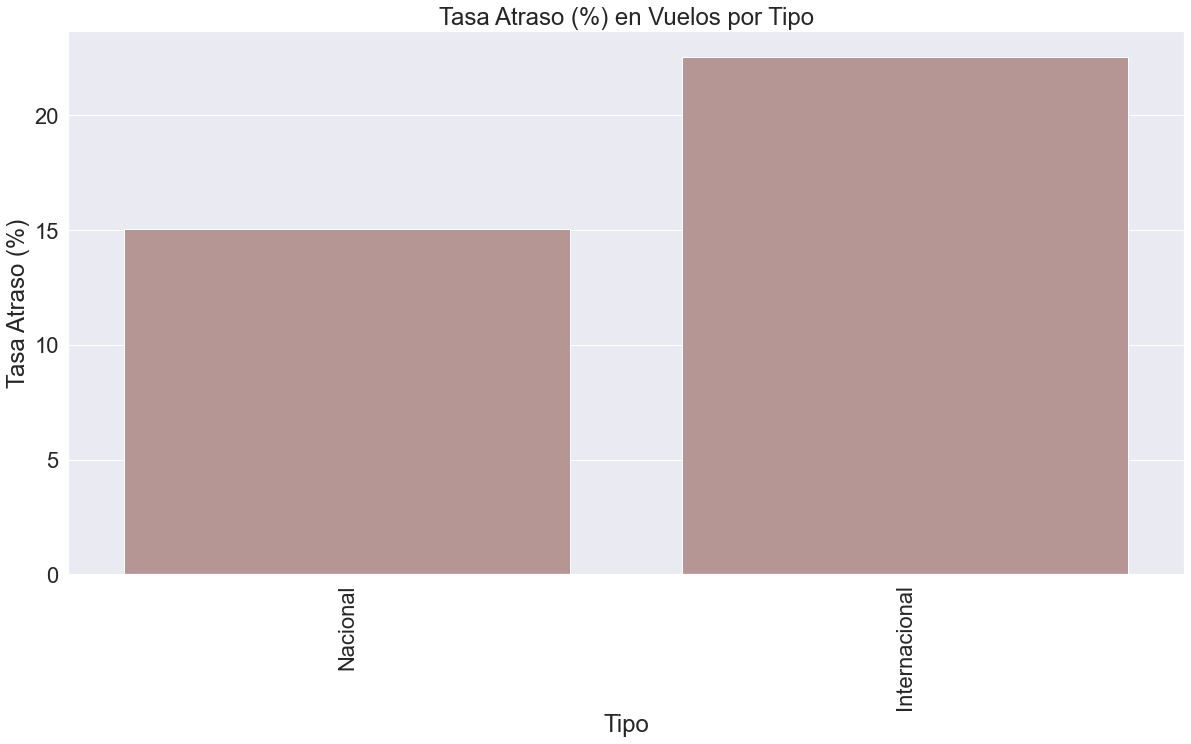

In [35]:
variable = "TIPOVUELO"
d = calcula_tasa(variable)
d = d.reindex(df_tipo["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"], color="rosybrown")

ax.set(xlabel = "Tipo", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Tipo")
plt.xticks(rotation=90)
plt.show()

2. La siguiente fórmula muestra la forma en que se calculará la tasa de retraso (TAR). La variable "Aerolinea" solo es un ejemplo de cómo se determinará la Tasa de Retraso para el resto:

$$TAR\text% = \frac{\text{Num de atrasos x Aerolinea}}{\text{Num Total de Operaciones}}\text{ x }100$$

In [36]:
# Generamos una función para calcular la tasa de retraso por destino, aerolínea, mes del año, 
# día de la semana, temporada y tipo de vuelo
def calcula_tasa(variable):

    x = df["atraso_15"].groupby(df[variable],sort=False).sum()
    r = df[variable].groupby(df[variable],sort=False).count()

    dic1 = {variable:[]}
    dic2 = {"Tasa Atraso %":[]}
    d3={}
    for i in range(len(x)):
        dic1[variable].append(x.index[i])
        #dic2["Tasa Atraso %"].append(x[i]/(r[i])*100)
        dic2["Tasa Atraso %"].append(x[i]/(len(df["atraso_15"]))*100)
        
    for d in (dic1, dic2): d3.update(d)
    d3=pd.DataFrame(d3)
    d3.set_index(variable, inplace = True)
    
    return d3


In [37]:
len(df["atraso_15"])

68206

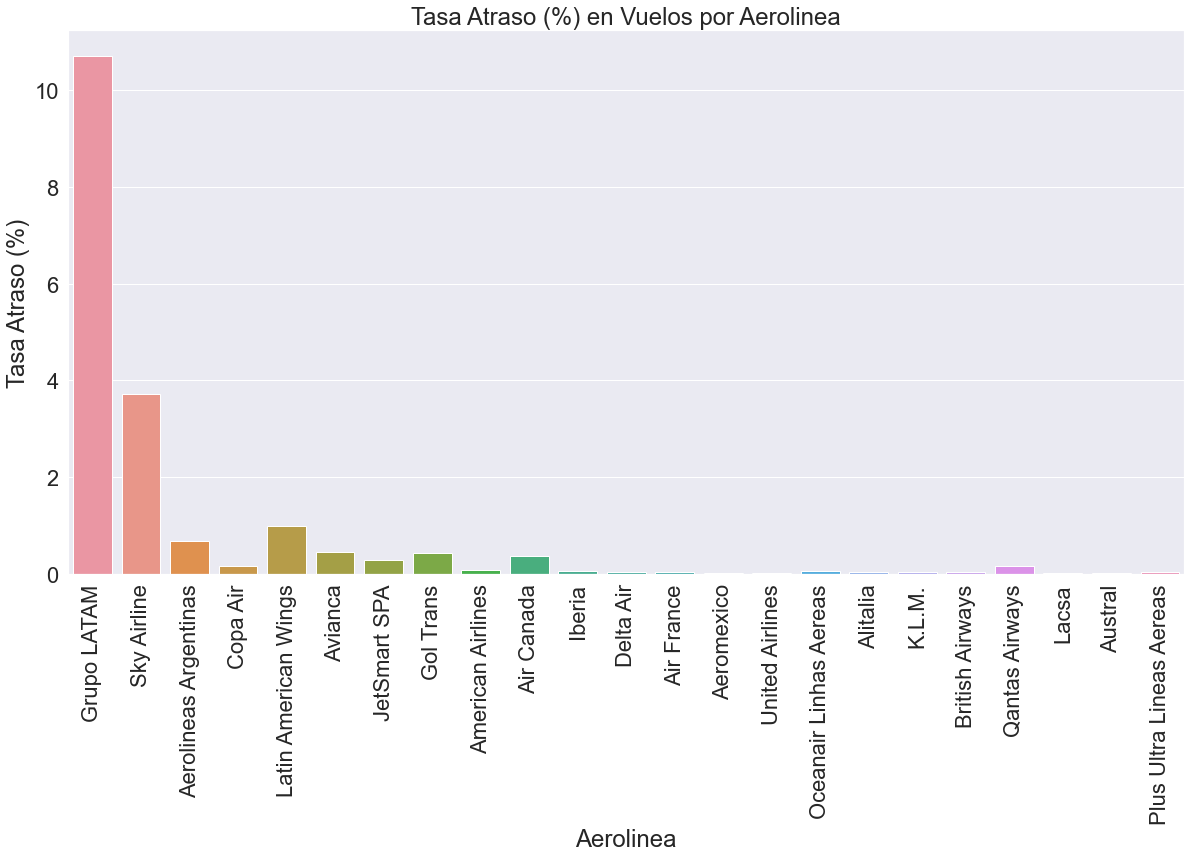

In [38]:
variable = "OPERA"
d = calcula_tasa(variable)
d = d.reindex(df_opera["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"])

ax.set(xlabel = "Aerolinea", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Aerolinea")
plt.xticks(rotation=90)
plt.show()

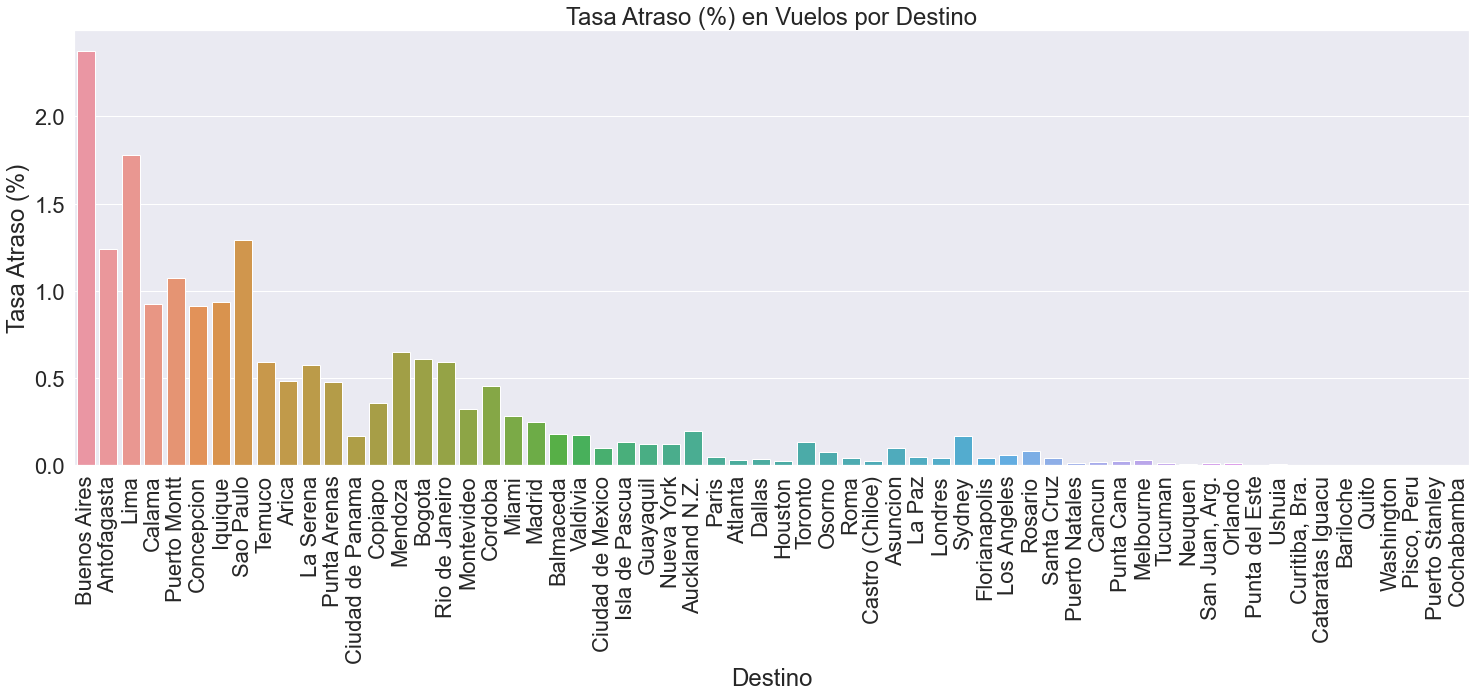

In [39]:
variable = "SIGLADES"
d = calcula_tasa(variable)
d = d.reindex(df_destino["index"].to_list())
d[variable] = d.index

plt.figure(figsize=(25,8))
ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"])

ax.set(xlabel = "Destino", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Destino")
plt.xticks(rotation=90)
plt.show()

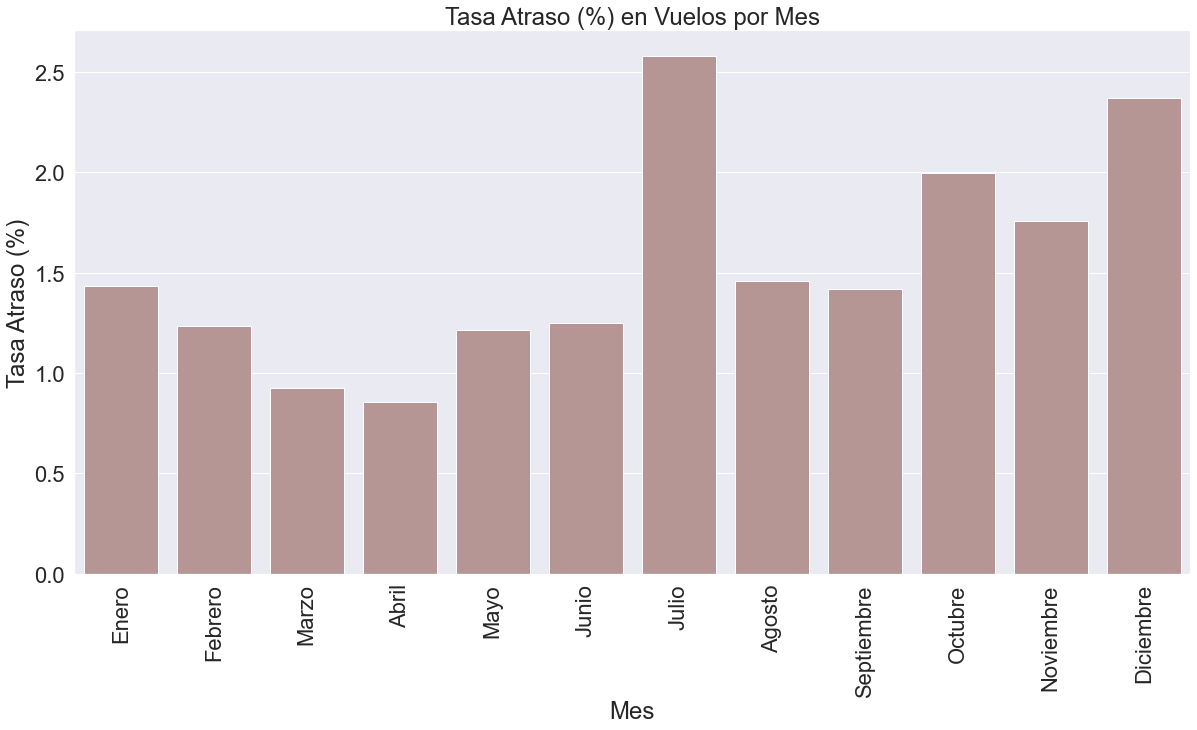

In [40]:
variable = "MES"
d = calcula_tasa(variable)
d = d.reindex(df_mes["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"],color="rosybrown")

ax.set(xlabel = "Mes", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Mes")
plt.xticks(rotation=90)
plt.show()

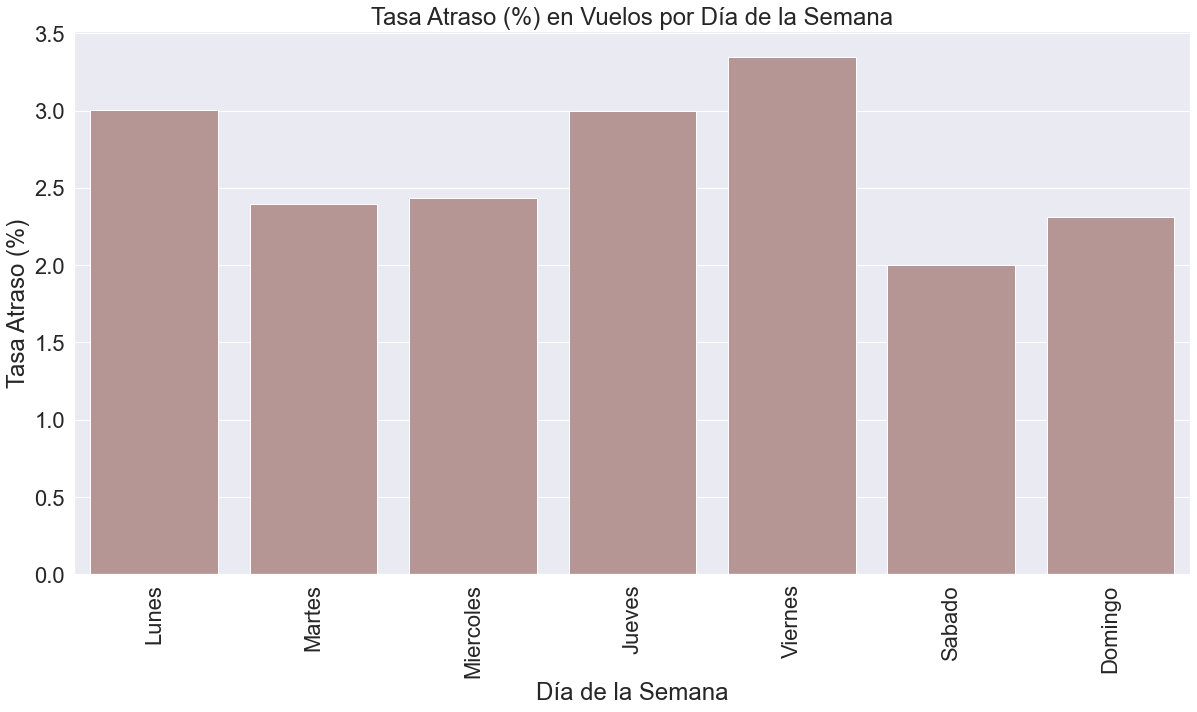

In [41]:
variable = "DIANOM"
d = calcula_tasa(variable)
d = d.reindex(df_dia_semana["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"],color="rosybrown")

ax.set(xlabel = "Día de la Semana", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Día de la Semana")
plt.xticks(rotation=90)
plt.show()

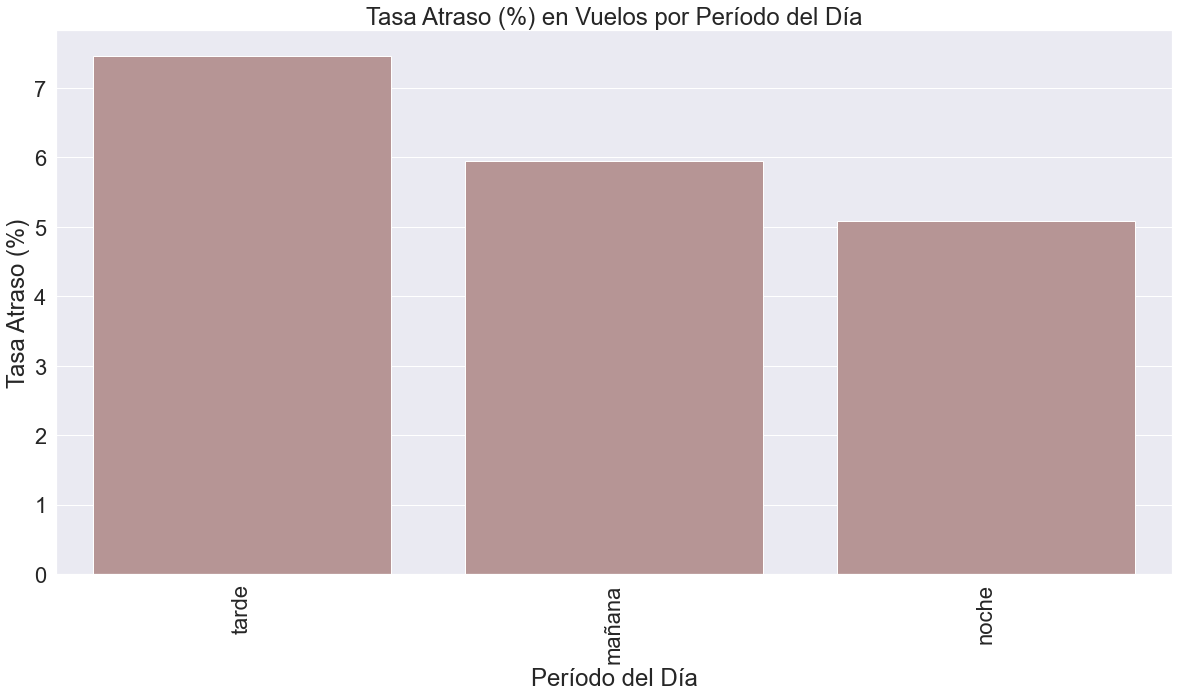

In [42]:
variable = "periodo_dia"
d = calcula_tasa(variable)
d = d.reindex(df_tao["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"], color="rosybrown")

ax.set(xlabel = "Período del Día", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Período del Día")
plt.xticks(rotation=90)
plt.show()

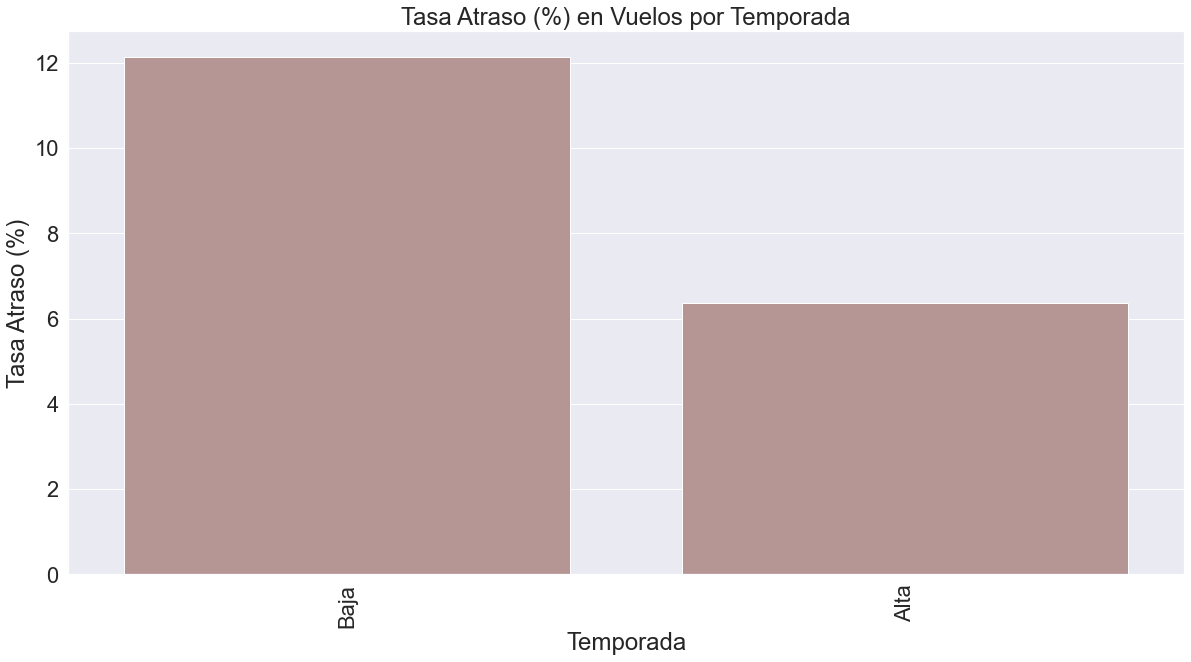

In [43]:
variable = "temporada_alta1"
d = calcula_tasa(variable)
d = d.reindex(df_ta["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"], color="rosybrown")

ax.set(xlabel = "Temporada", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Temporada")
plt.xticks(rotation=90)
plt.show()

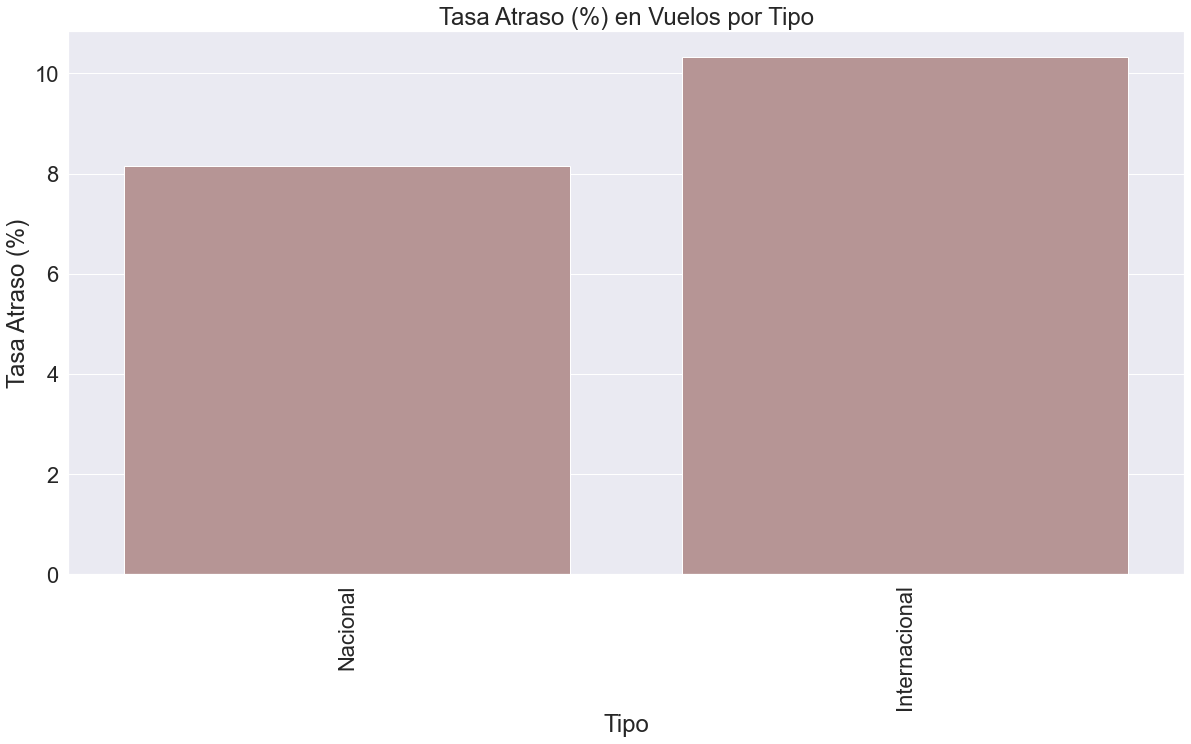

In [44]:
variable = "TIPOVUELO"
d = calcula_tasa(variable)
d = d.reindex(df_tipo["index"].to_list())
d[variable] = d.index

ax = sns.barplot(x =d[variable], y = d["Tasa Atraso %"], color="rosybrown")

ax.set(xlabel = "Tipo", 
        ylabel = "Tasa Atraso (%)", 
        title = "Tasa Atraso (%) en Vuelos por Tipo")
plt.xticks(rotation=90)
plt.show()

### - ¿Qué variables esperarías que más influyeran en predecir atrasos?

**Las variable que más esperaría en que influyan en el atraso son, mayor a menor:**

- **Aerolineas:** La coordinación de cada aerolinea con el aeropuerto es fundamental. Depende de muchos factores externos para lograr que el vuelo salga a la hora. 
    - Avión debe llegar a la hora para asegurar el slot,
    - Es distinto si los pasajeros abordan el avión en bus por la losa o por una manga telescópica,
    - Abastecimiento de combustible debe ser eficiente,
    - Carga de maletas de pasajeros o de carga aérea puede demorar el proceso de salida,
    - Distancia del acceso a la puerta de embarca puede demorar a los pasajeros en llegar al avión,  
    
    
- **Tipo:** Para el caso de los vuelos internacionales.
    - Internacional:
        - Por lo general son aviones más grandes con una capacidad de pasajeros mayor que los vuelos nacionales y el ordenar a los pasajeros al interior de la cabina puede ser "caos",
        - El tema de las maletas abajo del avión puede atrasar un poco el flujo normal, acompañado con el chequeo de maletas en el "counter"
        - El carguío de combustible para este tipo de aviones puede llevar más tiempo,
        - Espera del despegue en origen por descordinación de la torre de control en destino,
        - Clima, puede ser mejor que pase el mal clima y luego partir para que el desvío no sea grande.
        - Ese año la construcción del nuevo terminal Internacional estaba ejecutándose, con nuevos accesos, lo que puede llevar a una demora debido a no encontrar la puerta de embarque y lejanía no considerada.
        
    - Nacional:
        - Pueder ser que exista un alto tráfico de vuelos los **días lunes** debido a trabajadores de faenas mineras y se mezclen con la operación de los vuelos internacionales que están llegando.
        - Lo mismo anterior con la llegada de los vuelos nacionales y la salida los **días viernes**.  
        
- **Mes:**
    - Se ve un alto retraso en los vuelos del mes de Julio y Diciembre.
    - Esos meses son temporada muy alta de vacaciones de colegios/universidad y la suele viajar bastante. El aeropuerto no está diseñado para abastecer la demanda de aviones y pasajeros.
    

## 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

- Comenzaremos con un modelo de regresión lógística y le aplicaremos Cross-Validation para balancear la muestra de entrenamiento y validación. De esta forma la proporción de atrasos será la misma/parecida en el set de entrenamiento y validación.
- Luego obtendremos las métricas del modelo en conjunto con la matriz de confusión y la curva ROC
- Realizaremos un segundo modelo con XGboost con el cual obtendremos las mismas métricas del modelo anterior

In [45]:
# Seleccionamos las variables que utilizaremos en nuestros modelos
df_new=df[["SIGLAORI", "SIGLADES", "DIA", "MES", "DIANOM", "TIPOVUELO", "OPERA", "temporada_alta1", "periodo_dia"]]

In [46]:
# Las variables categóricas Creamos las variables dummies ya que son
X = pd.get_dummies(data = df_new, columns=df_new.columns)
y = df["atraso_15"]

In [47]:
# Observo la dimensión de mi nuevo Dataset
X.shape

(68206, 143)

In [48]:
# Importo las librerias que usaré
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
# Creo mi objeto LRCV
LRCV = LogisticRegressionCV()

In [50]:
# Divido mi dataset en datos de entrenamiento y testeo
# Le asigno un 80% de la data al entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)

In [51]:
# Entreno y realizo la predicción
LRCV.fit(X_train, y_train)
y_hat=LRCV.predict(X_test)

In [52]:
# Vemos las métricas del modelo
from sklearn import metrics
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11099
           1       0.56      0.04      0.08      2543

    accuracy                           0.82     13642
   macro avg       0.69      0.52      0.49     13642
weighted avg       0.77      0.82      0.75     13642



In [53]:
# Creamos una función para determinar la matriz de confunsión y poder interpretar de mejor sus valores

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusión normalizada')
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

Matriz de confusión, sin normalización
[[  112  2431]
 [   87 11012]]


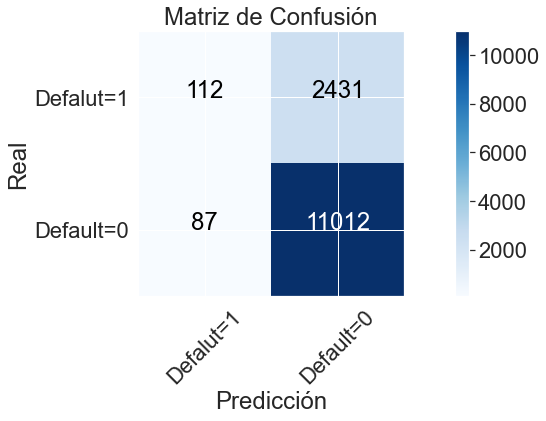

In [54]:
# Obtenemos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure(figsize=(15,6))
plot_confusion_matrix(cnf_matrix, classes=['Defalut=1','Default=0'], normalize= False, title='Matriz de Confusión')

In [55]:
# Vemos los accuracy de entrenamiento y validación
print('Accuracy train: ',round(accuracy_score(LRCV.predict(X_train), y_train),3))
print('Accuracy test: ',round(accuracy_score(y_hat, y_test),3))

Accuracy train:  0.817
Accuracy test:  0.815


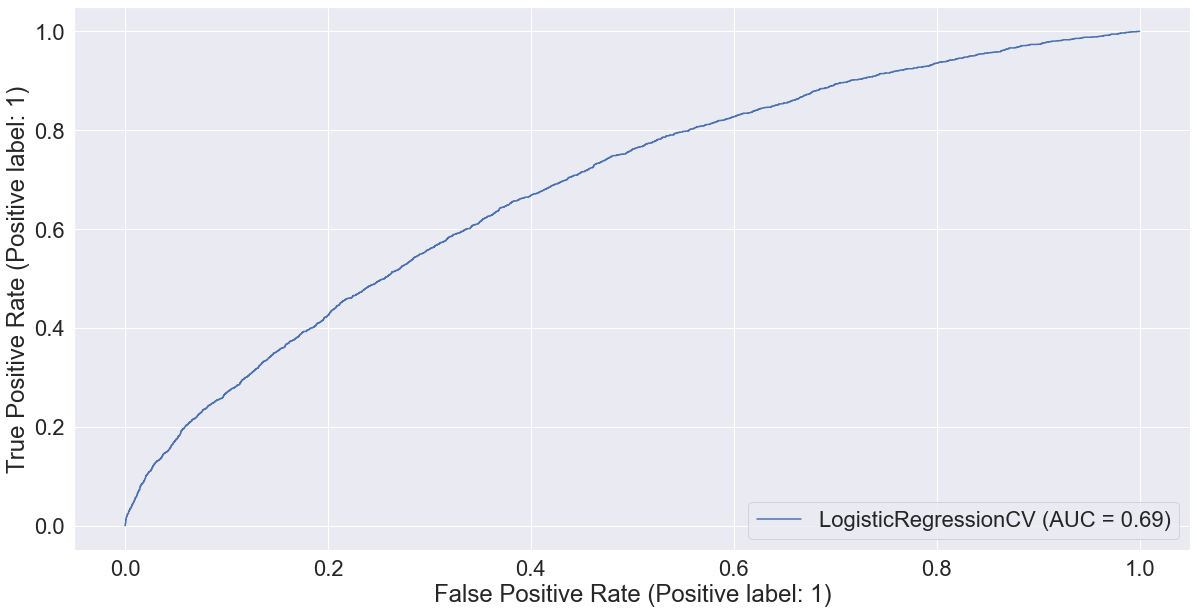

In [56]:
# Visualizamos la sensibilidad y especificidad a través de la curva ROC
from sklearn.metrics import RocCurveDisplay
LRCV_disp = RocCurveDisplay.from_estimator(LRCV, X_test, y_test)

In [57]:
# Ahora probamos un modelo de clasificación basado en árboles de decisión Xgboost
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.05, min_child_weight=0.05, n_estimators=500, objective='binary:logistic', booster='gbtree')

# Entreno al modelos y realizo la predicción
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Mido el accuracy y otrás métricas del modelo
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

[14:35:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11099
           1       0.73      0.07      0.12      2543

    accuracy                           0.82     13642
   macro avg       0.78      0.53      0.51     13642
weighted avg       0.81      0.82      0.76     13642

[[11037    62]
 [ 2375   168]]


Matriz de confusión, sin normalización
[[  168  2375]
 [   62 11037]]


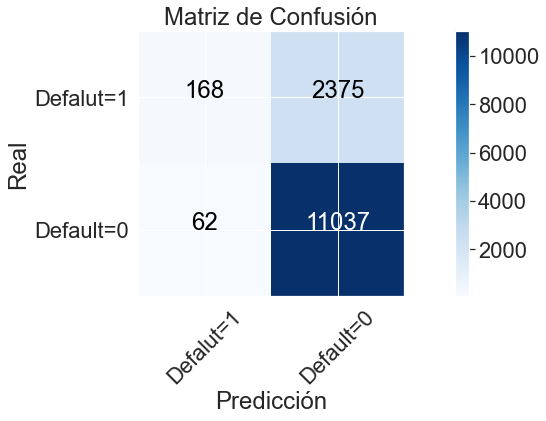

In [58]:
# Obtenemos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure(figsize=(15,6))
plot_confusion_matrix(cnf_matrix, classes=['Defalut=1','Default=0'], normalize= False, title='Matriz de Confusión')

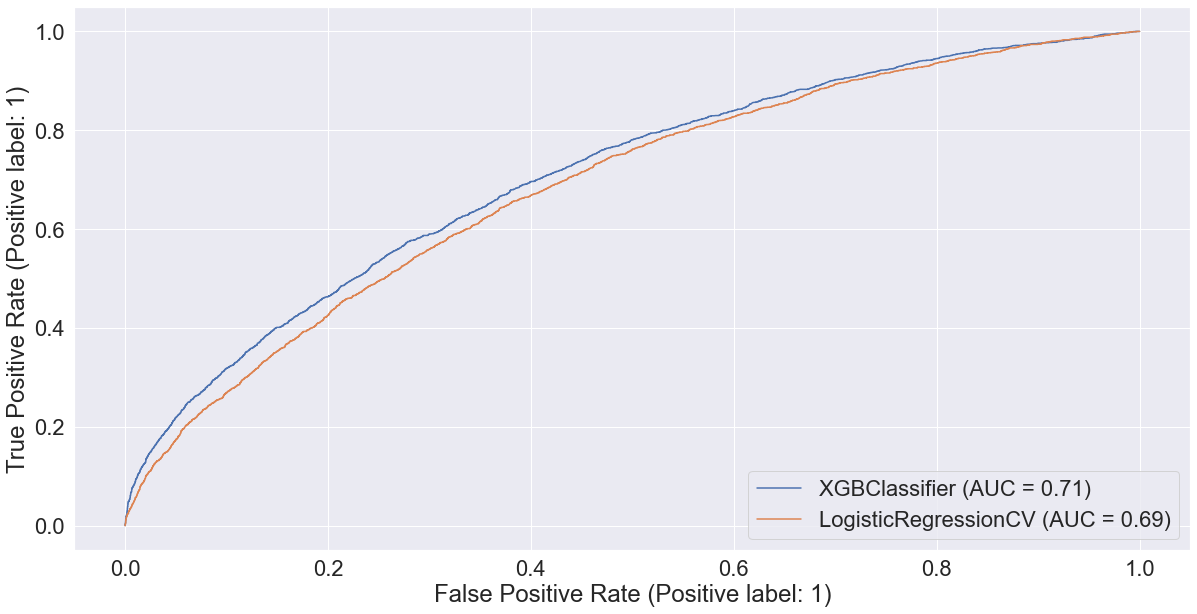

In [59]:
# Visualizamos las curvas ROC de ambos modelos
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
xgb_disp = RocCurveDisplay.from_estimator(XGB, X_test, y_test, ax=ax)
LRCV_disp.plot(ax=ax)

## Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular?

## Interpretación de los modelos:

**Siendo una problematica de clasificación, los modelos elegidos fueron: Regresión Logística y XGboost**

   - **Regresión Logística con Cross-Validation:** La regresión logística con  cross-validation nos permite balancear de mejor forma los valores "atrasos" y "no atrasos" de la muestra de entrenamiento con el de testeo. Con respecto a los parámetros, el accuracy del modelo es bastante bueno con un 82%, aunque la sensibilidad (proporción de detección de atrasos respecto a los datos entregados) es mala, solo de un 4%. La presición del modelo no encuentro que esté mala, obteniendo un 56% ( = 112 casos reales/ 199 casos predichos por el modelo) de precisión para los casos de atrasos.
   - **XGboost:** Este es un modelos muy robusto y es basado en árboles de decisión. Mejoró la predicción. Ambos tienen igual accuracy pero las métricas, como la especificidad y precisión cambiaron bastante. Tuvimos un 73% para la presición de los atrasos vs el 56% para el caso de la regresión logística.  
   
   - Para medir la eficiencia de nuestros modelos visualizamos la **curva ROC o el área bajo la curva (AUC)**. Vemos la que la curva ROC mejora con XGboost. El modelo tiene un 71% de distinguir entre atraso y no atraso.

## ¿Qué variables son las que más influyen en la predicción?

**A continuación muestro las variables que más influyen en el modelo**

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

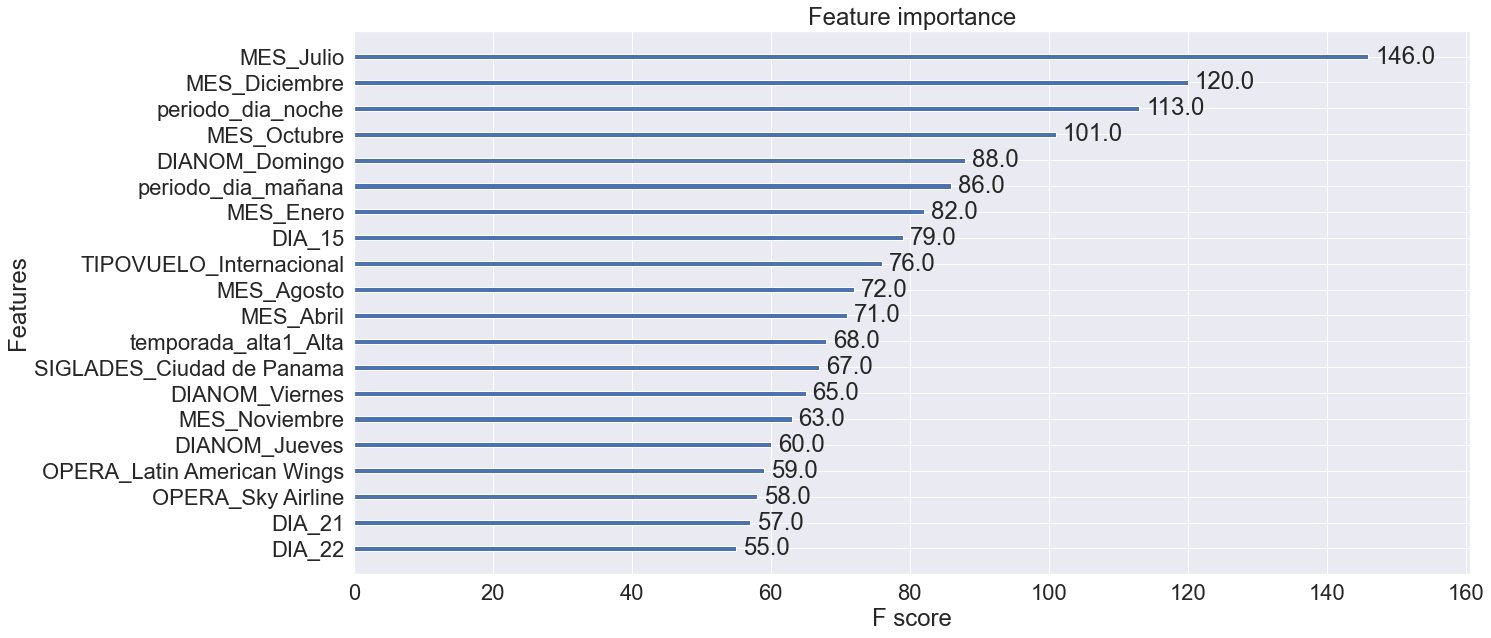

In [62]:
# Para efectos de visualización solo muestro las 20 primeras más importantes
from xgboost import plot_importance
plot_importance(XGB,max_num_features=20)

In [63]:
# Creo un dataframe con el peso de cada una de las variables
Var_Impo=XGB.get_booster().get_score(importance_type='weight')
Var_Impo = pd.DataFrame(Var_Impo.items(), columns=['Variables', 'Peso'])

In [64]:
# Las ordeno de mayor a menor prioridad
Var_Impo.sort_values(by=["Peso"], ascending = False, inplace = True)

In [65]:
# Veo el tamaño, se redujo en un 30% aproximadamente
len(Var_Impo)

103

In [66]:
# Obtengo los nombres de las variables
lis_var = Var_Impo.Variables.to_list()[:len(Var_Impo)]

In [67]:
# Creo mi nuevo Dataset con las nuevas 103 variables
X1 = X[lis_var]

In [68]:
# Verifico el tamaño de X1
X1.shape

(68206, 103)

In [69]:
# Creo las variables de entrenamiento y testeo
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y,test_size=0.2, random_state=123)

In [70]:
# Nuevamente entreno al modelo XGboost
clf1=XGBClassifier(max_depth=3, learning_rate=0.05, min_child_weight=0.05, n_estimators=500, objective='binary:logistic', booster='gbtree')

XGB1=clf1.fit(X1_train,y1_train)
prediction1=XGB1.predict(X1_test)

from sklearn import metrics
print(metrics.classification_report(y1_test, prediction1))
print(metrics.confusion_matrix(y1_test, prediction1))

[14:38:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11099
           1       0.73      0.07      0.12      2543

    accuracy                           0.82     13642
   macro avg       0.78      0.53      0.51     13642
weighted avg       0.81      0.82      0.76     13642

[[11037    62]
 [ 2375   168]]


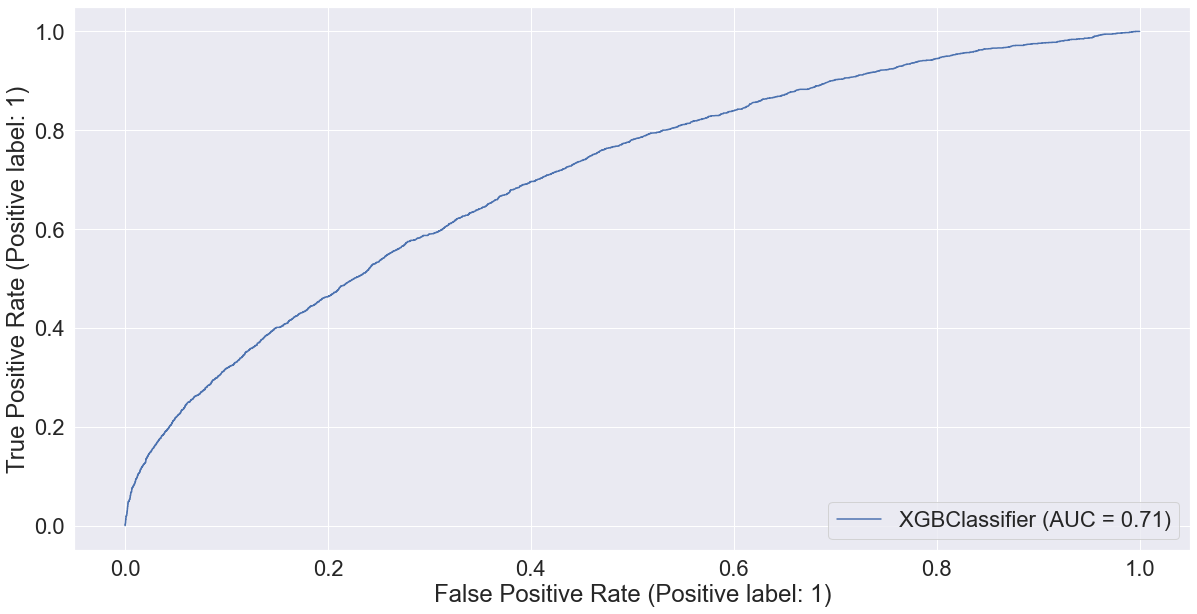

In [71]:
# Obtengo la nueva curva ROC
ax1 = plt.gca()
xgb_disp = RocCurveDisplay.from_estimator(XGB1, X1_test, y1_test, ax=ax1)

## Variables más importantes y como mejorar la performance del modelo
- Luego de detectar las variables más importantes para mi modelo, ocupo las 103 mejores. Con estas 103 redujo en casi un 30% el tamaño de mi dataset y lo hago más eficiente. Mejorando la performance de mi modelo original con 143 variables pero manteniendo las mismas métricas.
- Siendo el tamaño del modelo un 18% de atrasos y 82% de no atrasos, es muy complejo detectar cual será el punto de corte para una predicción con mejor performance. En mi caso particular, aumentaría las variables que puedan influir directamente en los atrasos (de acuerdo a las conclusiones de la pregunta N°3 explicación). Otra posible solución es el Cross-Validation que apliqué en el modelo de regresión.
- Mejoramiento de los hiperparámetros de los modelos.
- **A continuación incorporaremos una variable de agua lluvia por mes caída en SCEL durente el año 2017**:  
Fuente: https://climatologia.meteochile.gob.cl/application/anual/anuarioClimatologico/330021/2017


In [72]:
prec = {"Enero": 0, "Febrero":0,"Marzo": 0,"Abril":5,"Mayo":46.4,"Junio":42.2,"Julio":18.2,
        "Agosto":34.4,"Septiembre":16.8,"Octubre":18,"Noviembre":0.2,"Diciembre":0}

In [73]:
prec =pd.DataFrame(prec.items(), columns=['MES', 'lluvi_mm'])

In [74]:
df_new = pd.merge(df_new, prec, how="left", on=["MES"])

In [75]:
def lluvia(mm):
    if mm<10:
        return "bajo"
    elif ((mm>=10) & (mm<20)):
        return "medio"
    else: return "alto"

In [76]:
df_new["lluvi_mm"] = df_new["lluvi_mm"].apply(lluvia)

In [77]:
X = pd.get_dummies(data = df_new, columns=df_new.columns)

In [78]:
X1 =X[lis_var]

In [79]:
X1["lluvi_mm_alto"] = X["lluvi_mm_alto"]
X1["lluvi_mm_bajo"] = X["lluvi_mm_bajo"]
X1["lluvi_mm_alto"] = X["lluvi_mm_medio"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.2, random_state=123)

In [81]:
X1.head(5)

,MES_Julio,MES_Diciembre,periodo_dia_noche,MES_Octubre,DIANOM_Domingo,periodo_dia_mañana,MES_Enero,DIA_15,TIPOVUELO_Internacional,MES_Agosto,...,SIGLADES_Los Angeles,SIGLADES_Punta Cana,SIGLADES_Bogota,SIGLADES_Temuco,DIA_29,SIGLADES_Puerto Montt,SIGLADES_Neuquen,OPERA_Aerolineas Argentinas,lluvi_mm_alto,lluvi_mm_bajo
0,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
clf1=XGBClassifier(max_depth=3, learning_rate=0.05, min_child_weight=0.05, n_estimators=500, objective='binary:logistic', booster='gbtree')

XGB=clf1.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

[14:39:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11099
           1       0.71      0.06      0.11      2543

    accuracy                           0.82     13642
   macro avg       0.77      0.53      0.51     13642
weighted avg       0.80      0.82      0.75     13642

[[11038    61]
 [ 2390   153]]


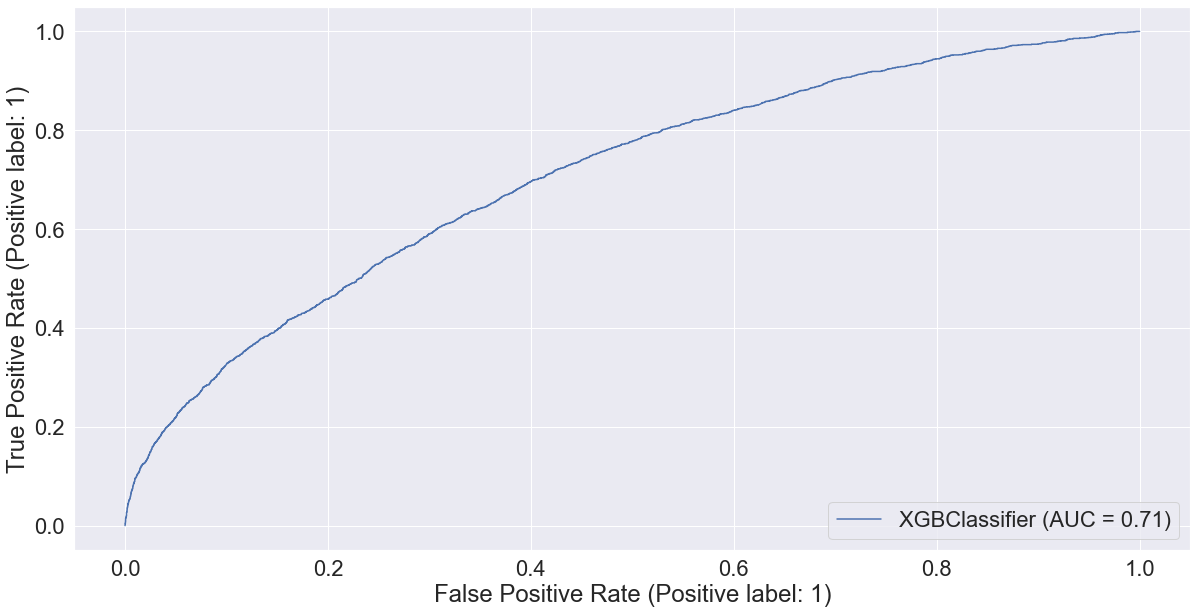

In [83]:
ax = plt.gca()
xgb_disp = RocCurveDisplay.from_estimator(XGB, X_test, y_test, ax=ax)

- Acabamos de incorparar la variable lluvia en origen y el modelo no mejoró, de lo contrario, empeoró. En conclusión, debemos ser acucioso en la incorporación de variables nuevas al modelo ya que cada una puede implicar un trabajo no menor o/y un mejoramiento marginal en la performance de nuestro modelo.